# House Price Predection using Advanced Linear Regression

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

Essentially, the company wants —
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [65]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

In [66]:
# importing libraries specific to Linear Regression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder,scale
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## Steps to be followed
- Step 1: Reading and Understanding Data
- Step 2: Visualising Data
- Step 3: Data Preparation
- Step 4: Scaling Features
- Step 5: Train & Test Data Split
- Step 6: Building Model & Evaluation
- Step 7: Regularization usuing Ridge/Lasso Regression for Overfitted Model

## Step 1: Reading and Understanding the Data

In [67]:
pd.options.display.max_columns=None
house_data = pd.read_csv('train.csv')
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [68]:
house_data.shape

(1460, 81)

In [69]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Observation
- Some features are having null values

#### Missing Value Treatment

In [70]:
# Defining function for displaying data in table
def show_data_table(df):
    x = PrettyTable()
    x.field_names = df.columns
    for index,row in df.iterrows():
        x.add_row(row)
    return x

In [71]:
x = pd.DataFrame(house_data.isnull().sum().sort_values(ascending=False))
x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'}, inplace=True)
print(show_data_table(x[:20]))

+--------------+-------+
|   feature    | count |
+--------------+-------+
|    PoolQC    |  1453 |
| MiscFeature  |  1406 |
|    Alley     |  1369 |
|    Fence     |  1179 |
| FireplaceQu  |  690  |
| LotFrontage  |  259  |
| GarageYrBlt  |   81  |
|  GarageCond  |   81  |
|  GarageType  |   81  |
| GarageFinish |   81  |
|  GarageQual  |   81  |
| BsmtFinType2 |   38  |
| BsmtExposure |   38  |
|   BsmtQual   |   37  |
|   BsmtCond   |   37  |
| BsmtFinType1 |   37  |
|  MasVnrArea  |   8   |
|  MasVnrType  |   8   |
|  Electrical  |   1   |
|      Id      |   0   |
+--------------+-------+


#### Remove features which are having null/missing values more than 50% values and for the rest, replace it with median/mode

In [72]:
min_count = int(house_data.shape[0]/2)
house_data.dropna(axis=1,thresh=min_count, inplace=True)

#### Shape of data after dropping

In [73]:
house_data.shape

(1460, 77)

#### Observation:
 - Total 4 features are removed

In [74]:
# Now replacing missing values for indivisual feature
x = pd.DataFrame(house_data.isnull().sum().sort_values(ascending=False))
x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'}, inplace=True)
print(show_data_table(x[:16]))

+--------------+-------+
|   feature    | count |
+--------------+-------+
| FireplaceQu  |  690  |
| LotFrontage  |  259  |
|  GarageType  |   81  |
| GarageYrBlt  |   81  |
| GarageFinish |   81  |
|  GarageQual  |   81  |
|  GarageCond  |   81  |
| BsmtExposure |   38  |
| BsmtFinType2 |   38  |
|   BsmtQual   |   37  |
|   BsmtCond   |   37  |
| BsmtFinType1 |   37  |
|  MasVnrArea  |   8   |
|  MasVnrType  |   8   |
|  Electrical  |   1   |
| KitchenAbvGr |   0   |
+--------------+-------+


In [75]:
features_having_missing_values = list(x.feature[:15])

In [76]:
house_data[features_having_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   770 non-null    object 
 1   LotFrontage   1201 non-null   float64
 2   GarageType    1379 non-null   object 
 3   GarageYrBlt   1379 non-null   float64
 4   GarageFinish  1379 non-null   object 
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  BsmtFinType1  1423 non-null   object 
 12  MasVnrArea    1452 non-null   float64
 13  MasVnrType    1452 non-null   object 
 14  Electrical    1459 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


#### Observation:
 - Out of 15 features which have null values, 3 features are Numeric and 12 are Categorical

In [77]:
numeric_features_having_missing_values = house_data[features_having_missing_values].select_dtypes(include=['float64']).columns
categorical_features_having_missing_values = house_data[features_having_missing_values].select_dtypes(include=['object']).columns

In [78]:
print(numeric_features_having_missing_values)
print(categorical_features_having_missing_values)

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')
Index(['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'Electrical'],
      dtype='object')


In [79]:
# Replacing missing values with median and mode for numeric features and categorical features respectively
for feature in numeric_features_having_missing_values:
    median = house_data[feature].median()
    house_data[feature].fillna(median, inplace=True)

for feature in categorical_features_having_missing_values:
    # As mode method gives series and we need mode value so have to access 0th value
    mode = house_data[feature].mode()[0]
    house_data[feature].fillna(mode, inplace=True)

In [80]:
# Checking if any missing value exists in data
x = pd.DataFrame(house_data.isnull().sum().sort_values(ascending=False))
x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'}, inplace=True)
print(show_data_table(x[:5]))

+-------------+-------+
|   feature   | count |
+-------------+-------+
|      Id     |   0   |
|   HalfBath  |   0   |
| FireplaceQu |   0   |
|  Fireplaces |   0   |
|  Functional |   0   |
+-------------+-------+


##### Observation
- No missing data found

#### Checking for duplicate rows

In [81]:
duplicate_rows = house_data[house_data.duplicated(['Id'])]
duplicate_rows.shape

(0, 77)

##### Observation
- No duplicate data point found
- As Id feature is not useful, we'll drop it

In [82]:
house_data.drop(['Id'],axis=1,inplace=True)

In [83]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Derived Metrics
- Getting Percentage of Living Area (above ground) w.r.t. Lot Area

In [84]:
house_data['GrLivAreaPercent']=round((house_data['GrLivArea']/house_data['LotArea'])*100,2)

### Outlier Treatment
- We will use IQR proximity method 

#### Checking outliers

In [85]:
sns.set_theme(context='poster',palette='husl',style='whitegrid')

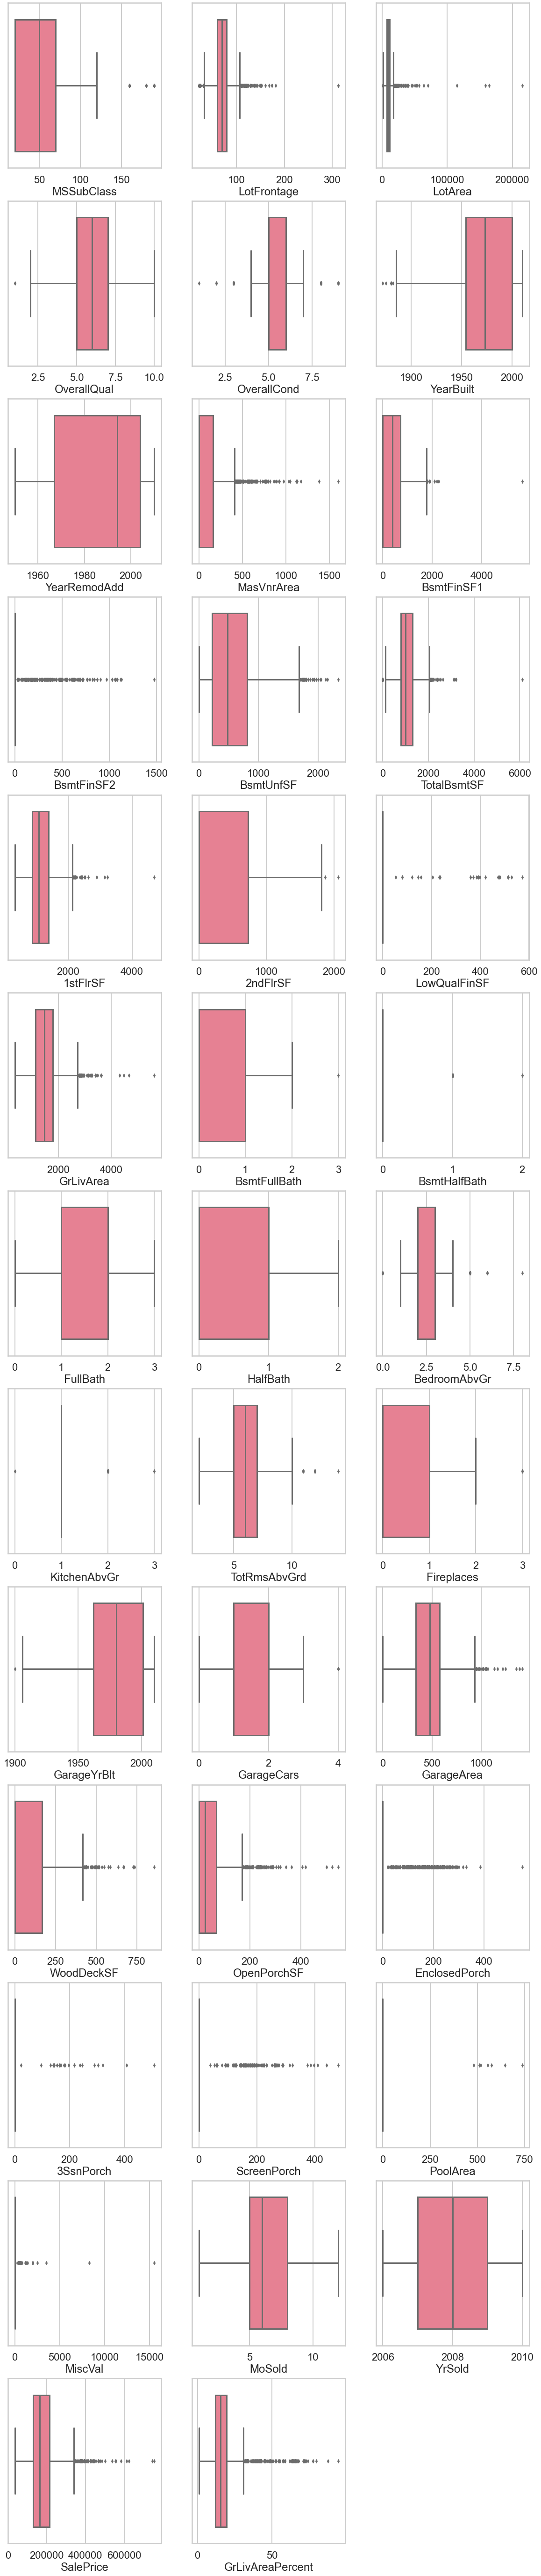

In [86]:
numeric_features = house_data.select_dtypes(include=['float64','int64']).columns

j=1
plt.figure(figsize=(20,100))
for i in numeric_features:
    plt.subplot(13,3,j)
    sns.boxplot(house_data[i], palette='husl')
    j+=1
plt.show()

##### Observation
- Some of the numeric variables are having outliers


#### Step 1: Finding upper & lower bound for data

In [87]:
upper_lower_bound_obj ={}
for i in numeric_features:
    q1 = np.quantile(house_data[i],0.25)
    q3 = np.quantile(house_data[i],0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    if lower_bound < 0:
        lower_bound = np.min(house_data[i])
    if upper_bound < 0:
        upper_bound = np.min(house_data[i])
    upper_lower_bound_obj[i] = {'lower_bound':lower_bound,'upper_bound':upper_bound}

#### Step 2: Replacing outliers with lower/upper bound

In [88]:
for i in numeric_features:
    house_data.loc[house_data[i] > upper_lower_bound_obj[i]['upper_bound'],i] = upper_lower_bound_obj[i]['upper_bound']
    house_data.loc[house_data[i] < upper_lower_bound_obj[i]['lower_bound'],i] = upper_lower_bound_obj[i]['lower_bound']

#### Verifying that outliers removed or not

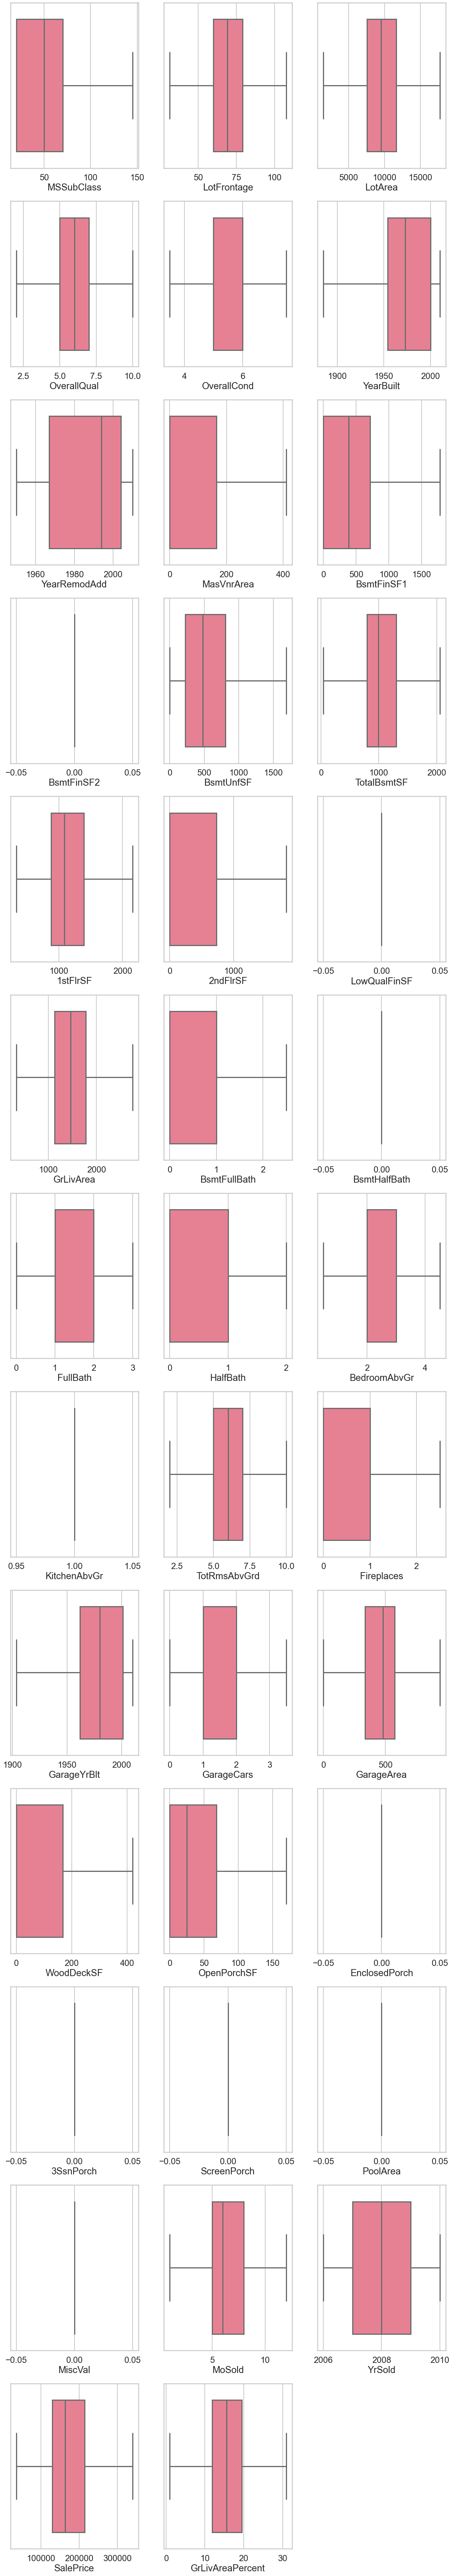

In [89]:
j=1
plt.figure(figsize=(20,120))
for i in numeric_features:
    plt.subplot(13,3,j)
    sns.boxplot(house_data[i], palette='husl')
    j+=1
plt.show()

##### Observation
- All numeric variables are having no outliers


## Step 2: Visualising the Data

### Univariate analysis

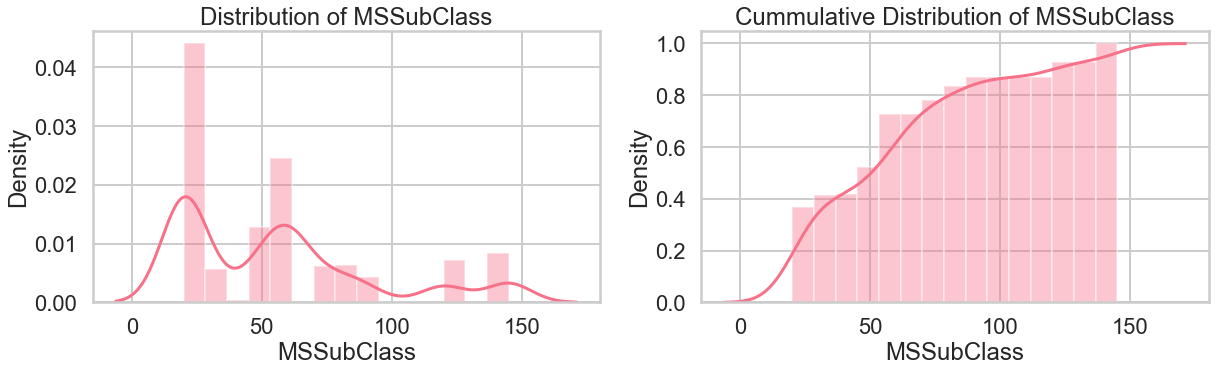

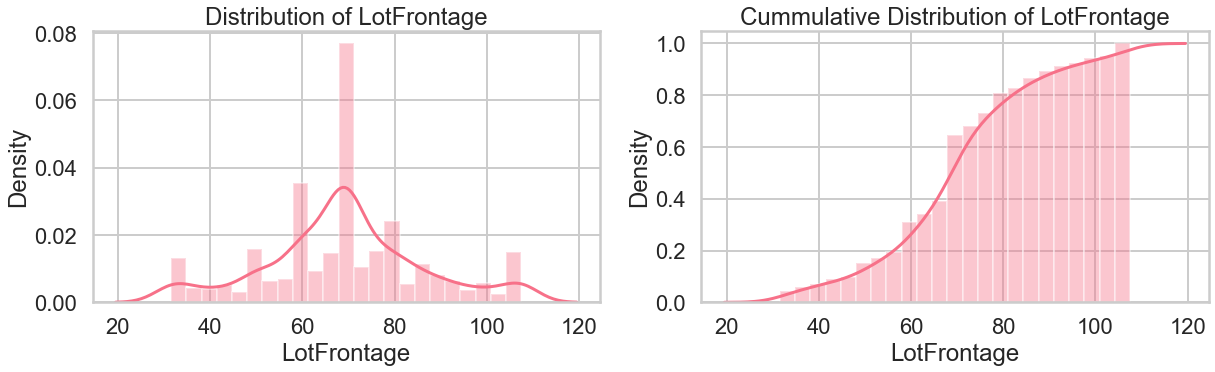

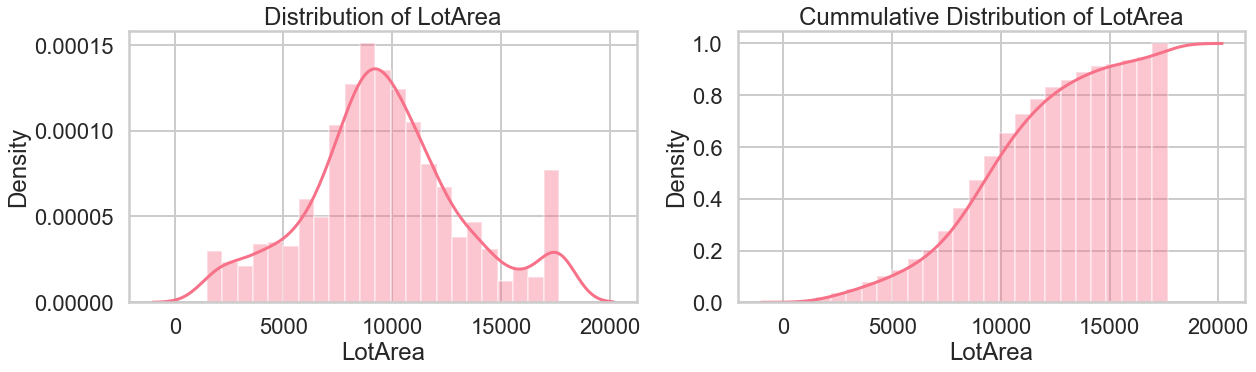

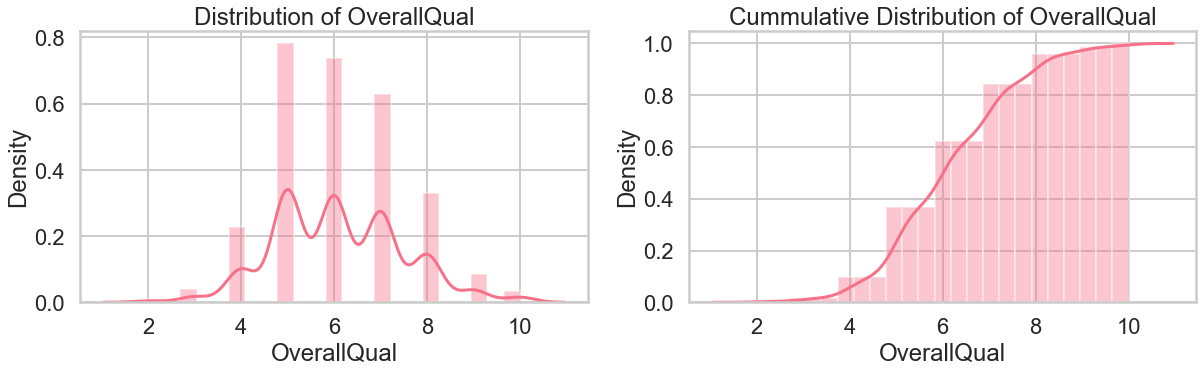

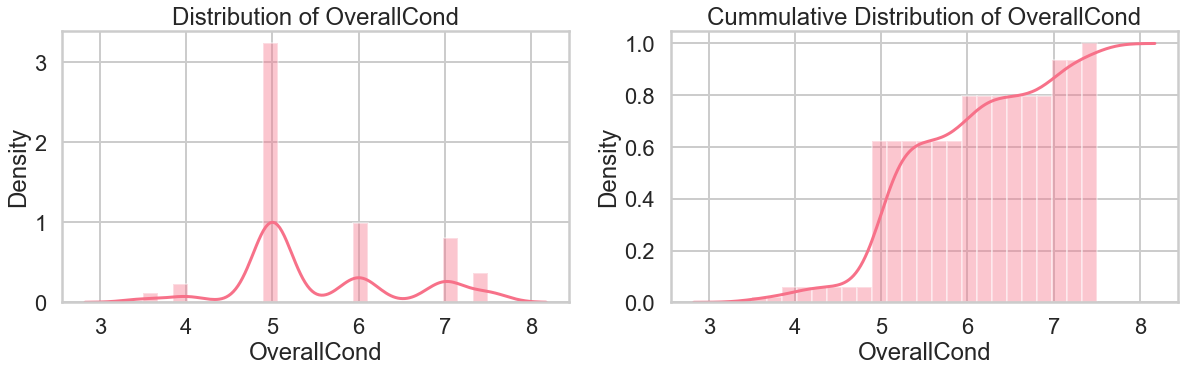

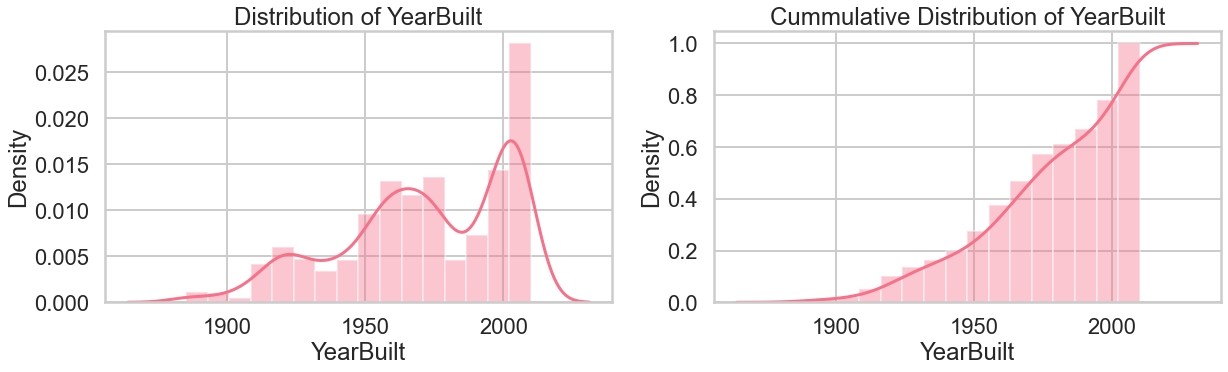

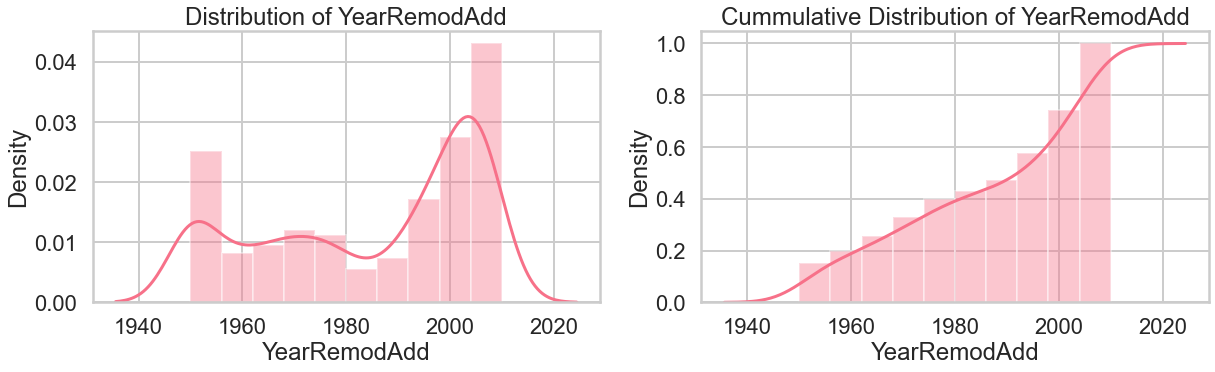

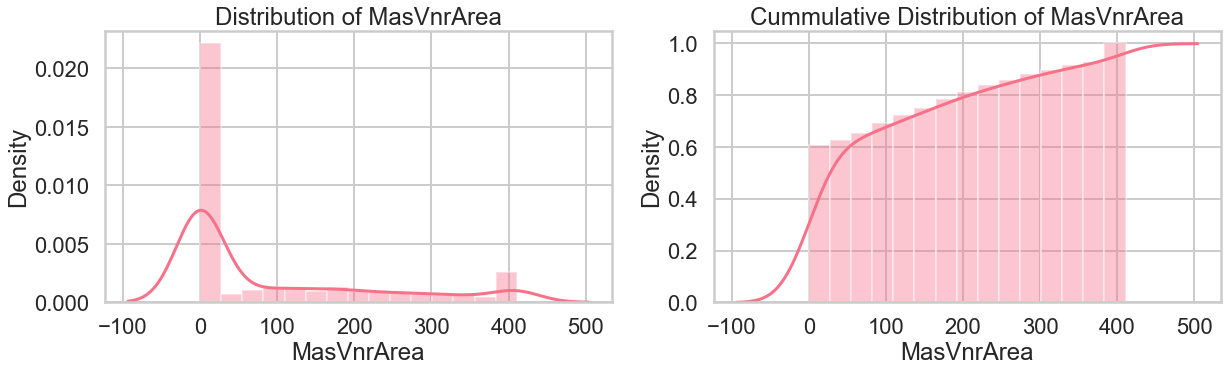

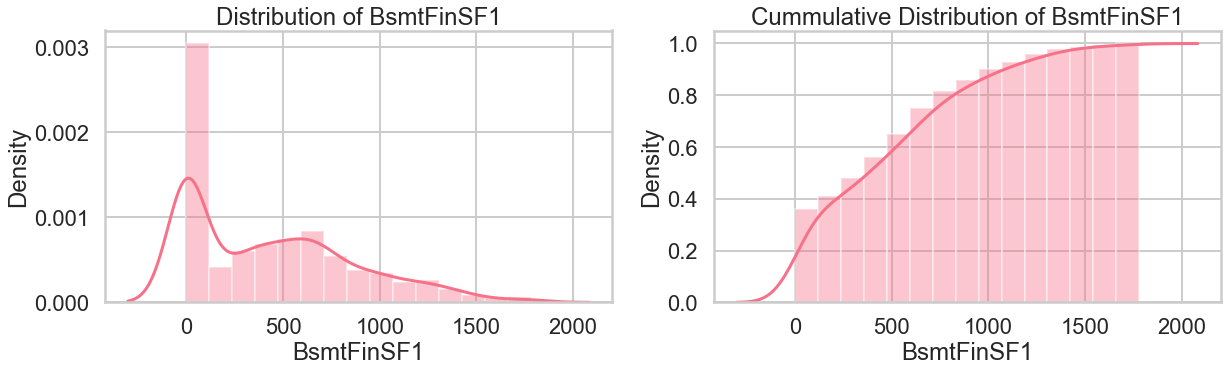

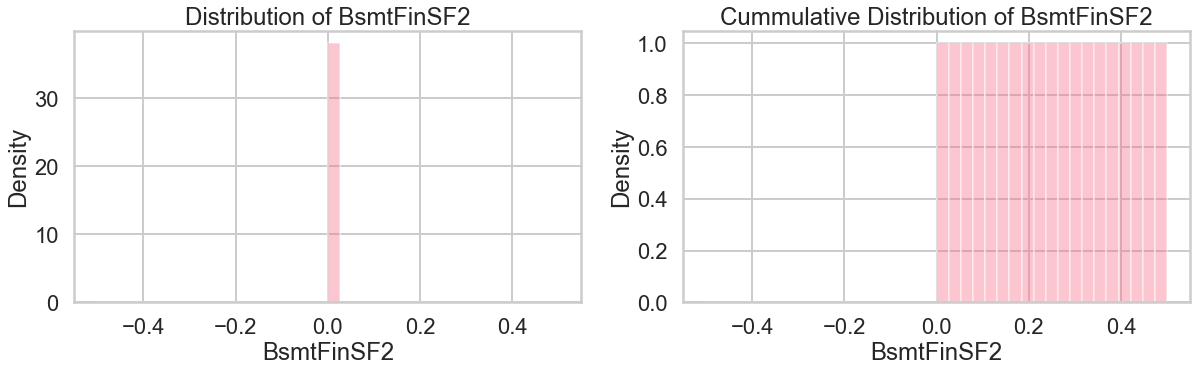

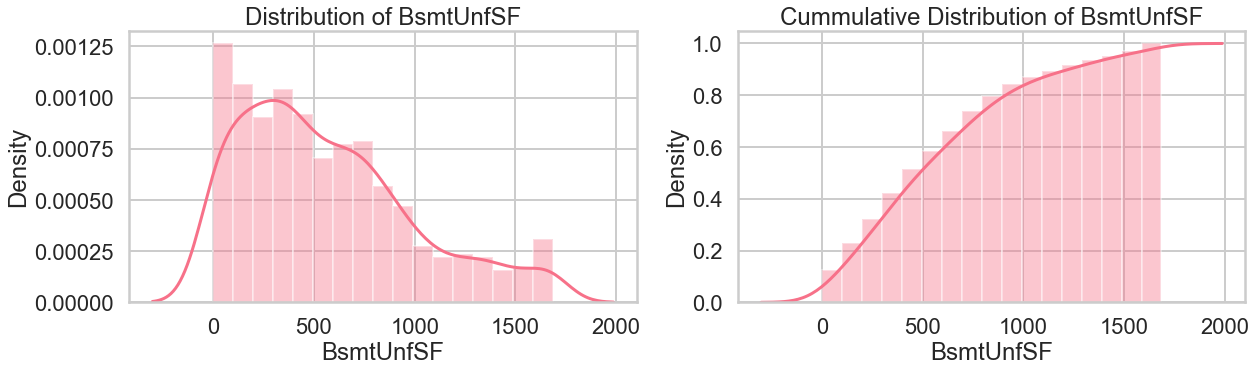

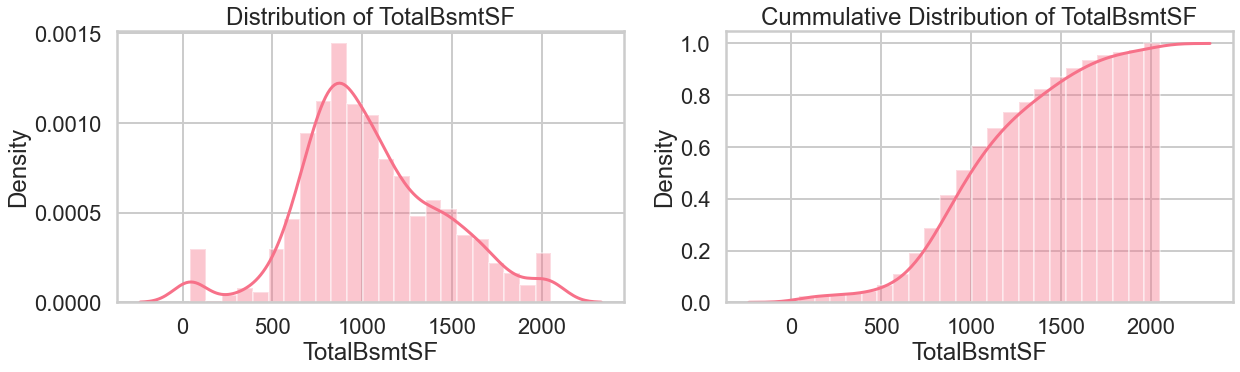

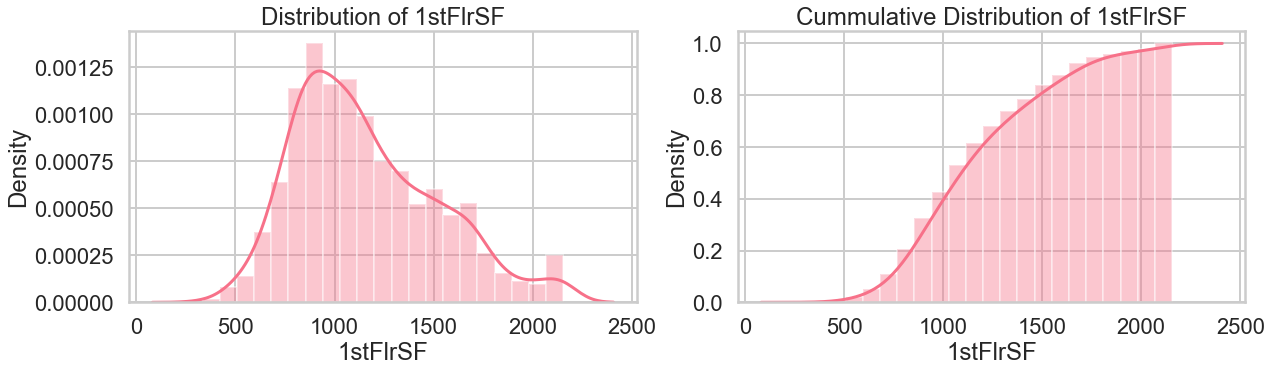

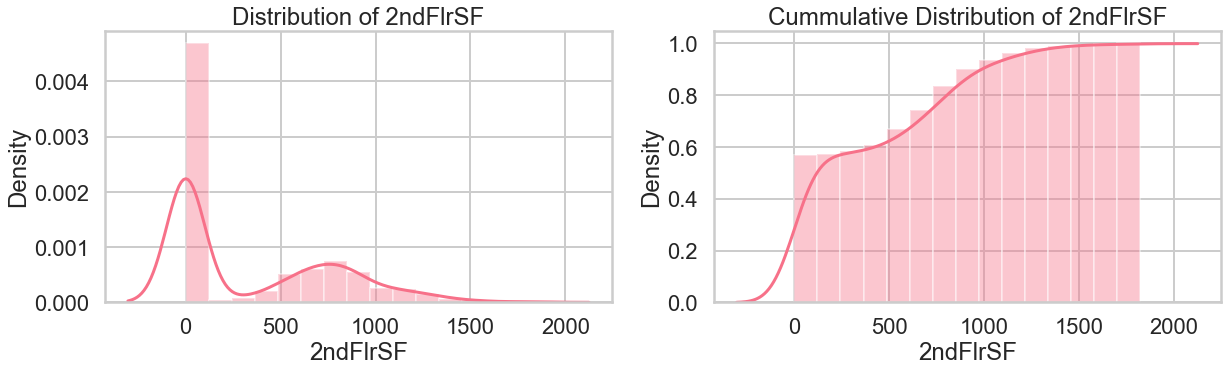

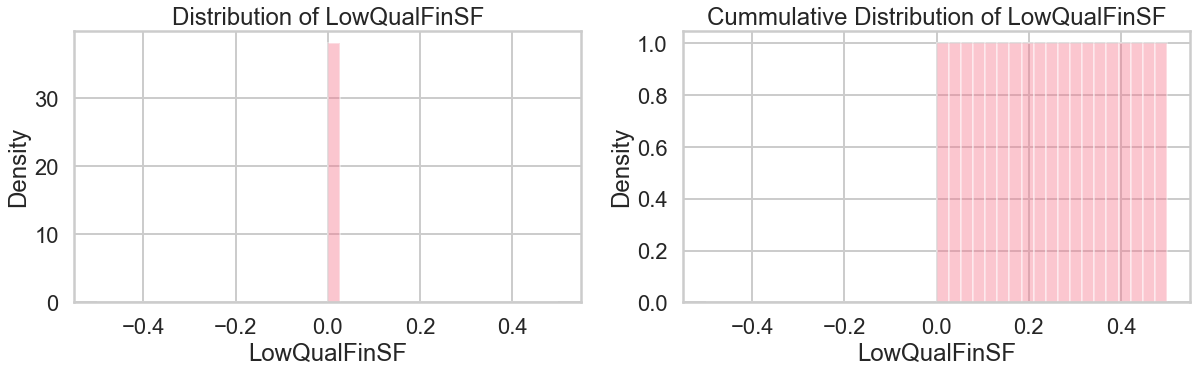

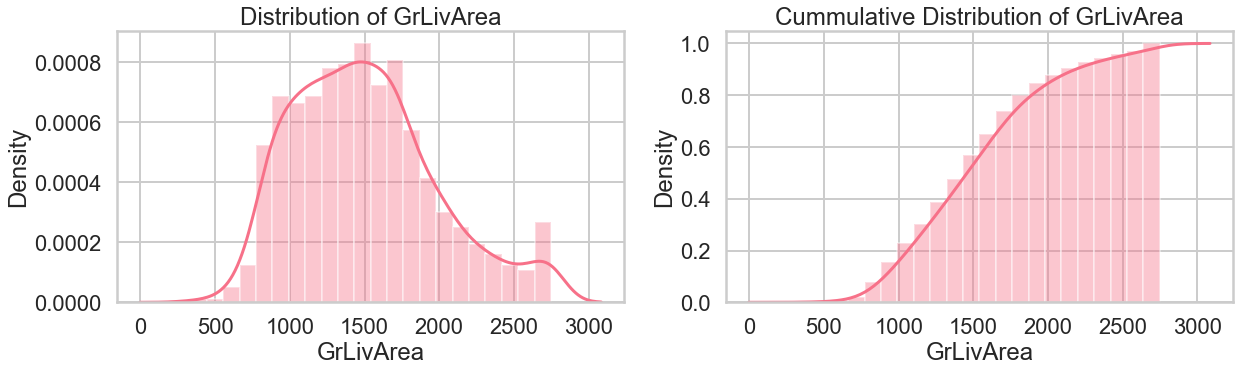

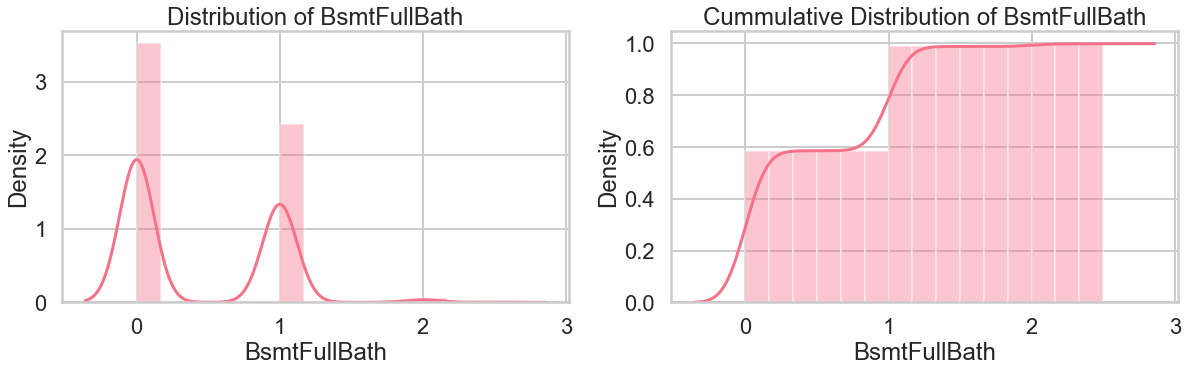

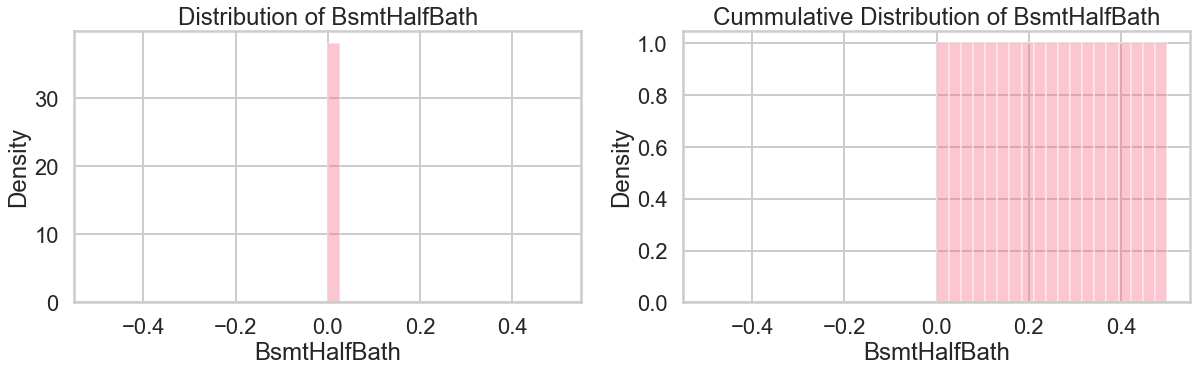

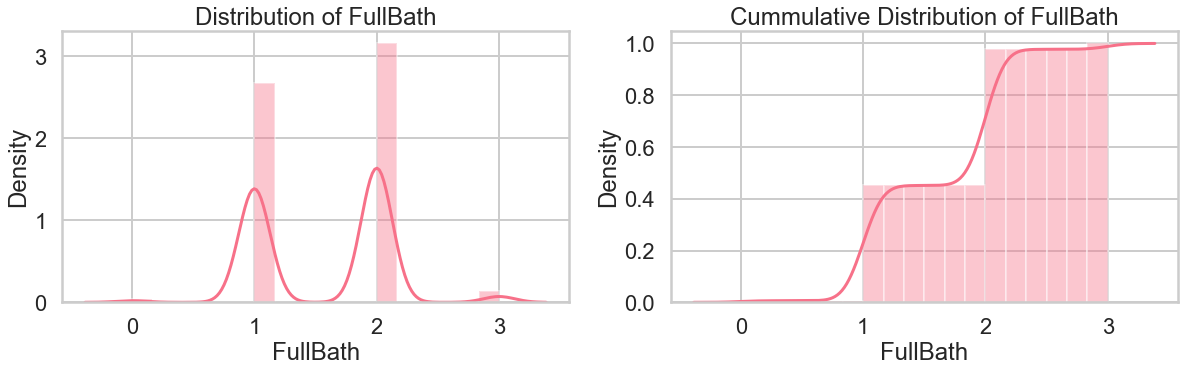

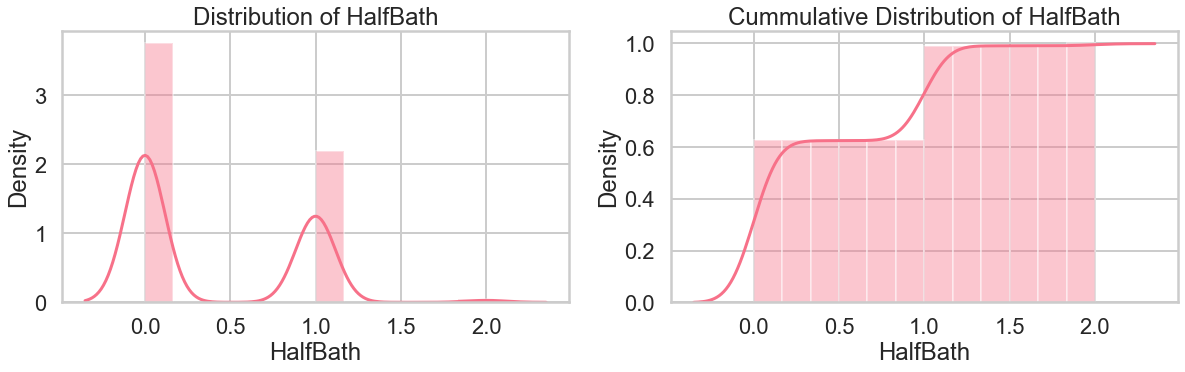

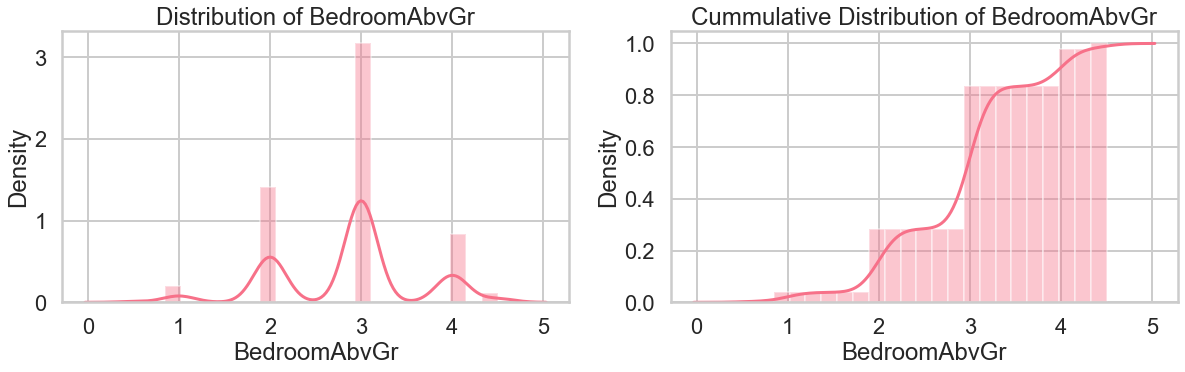

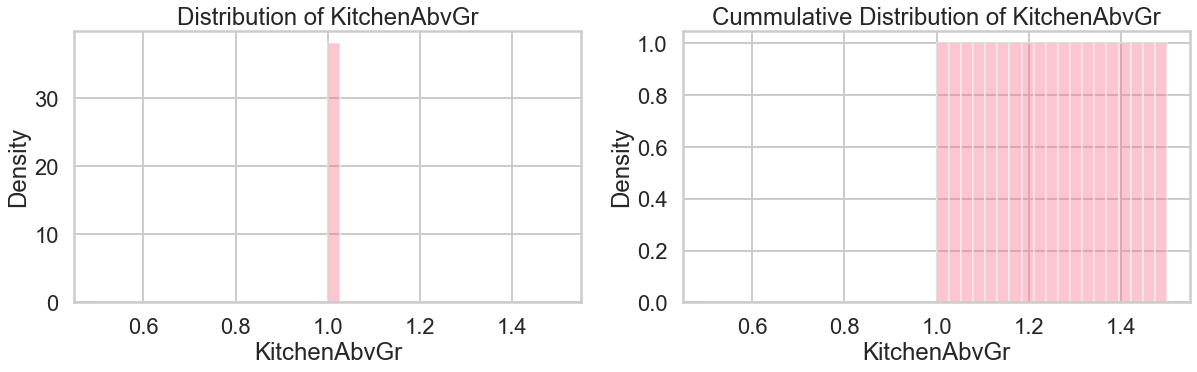

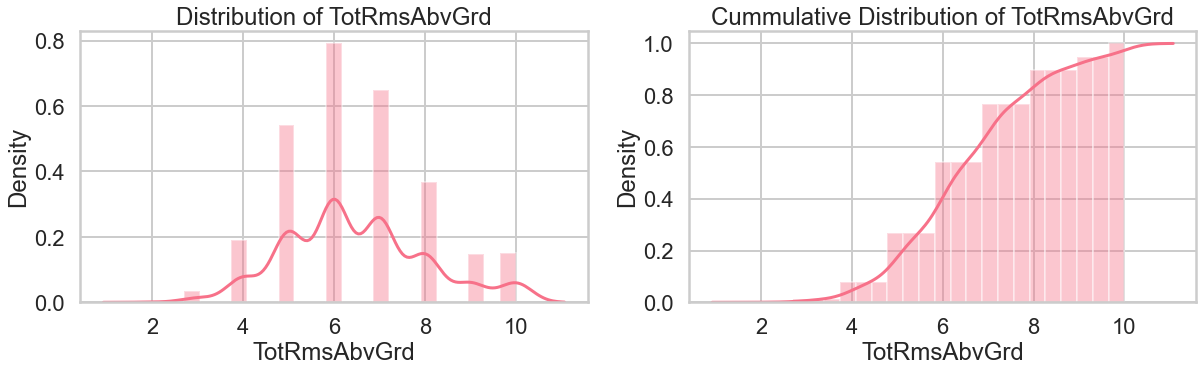

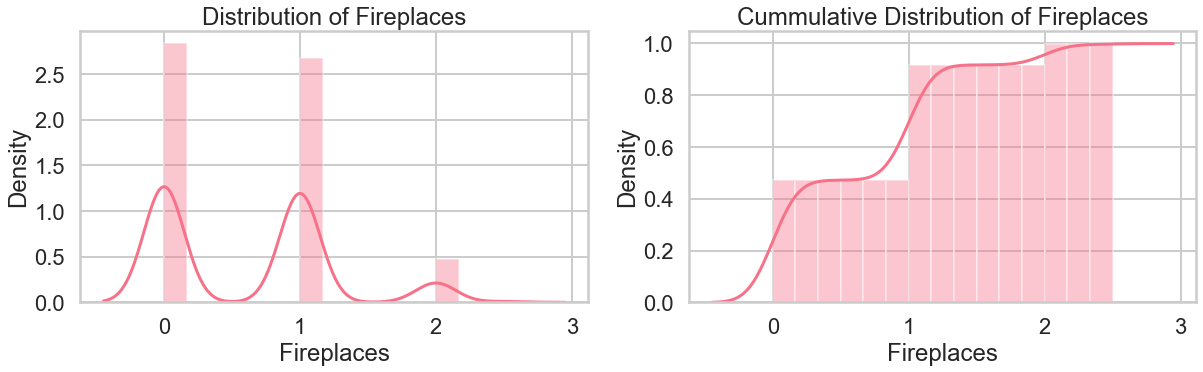

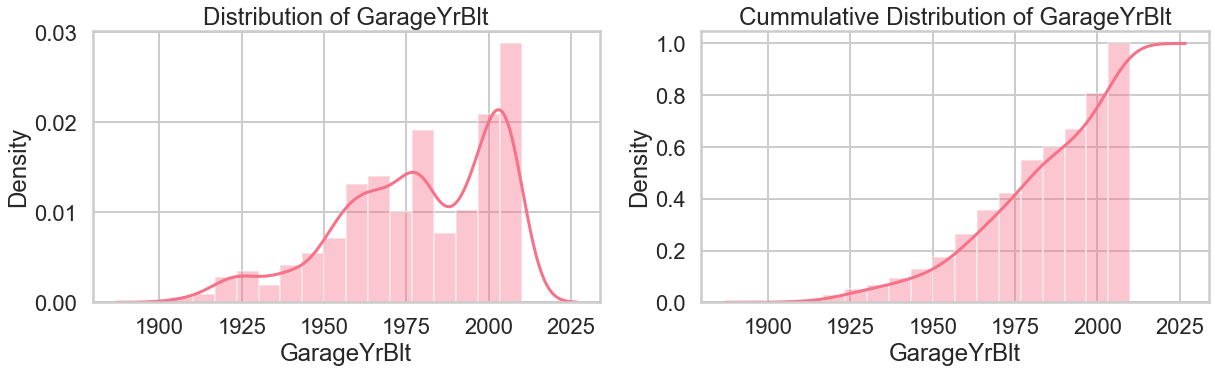

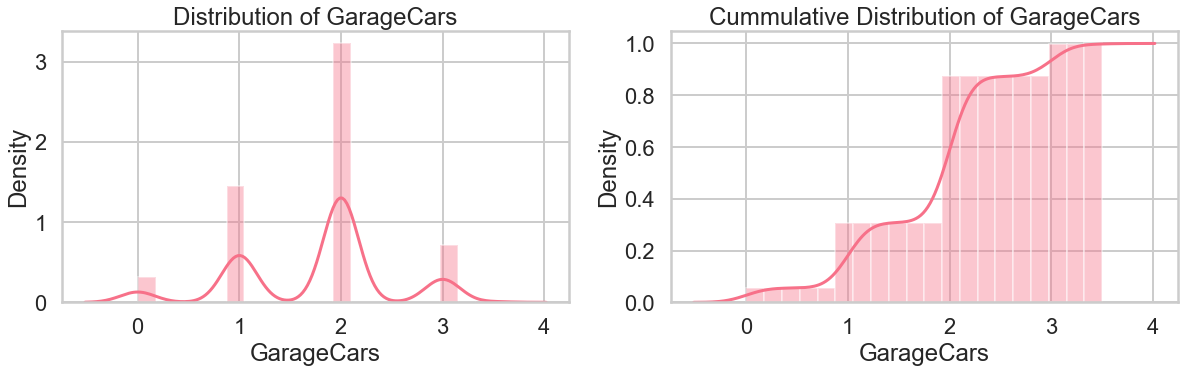

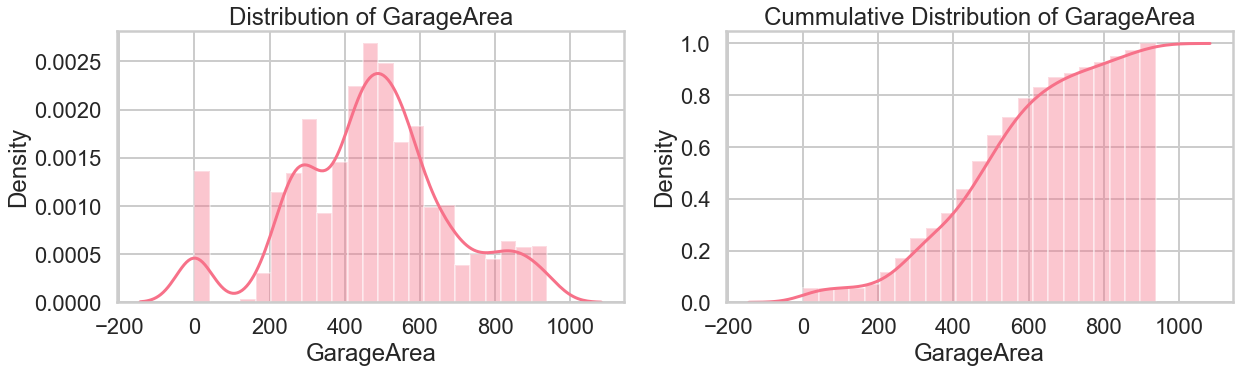

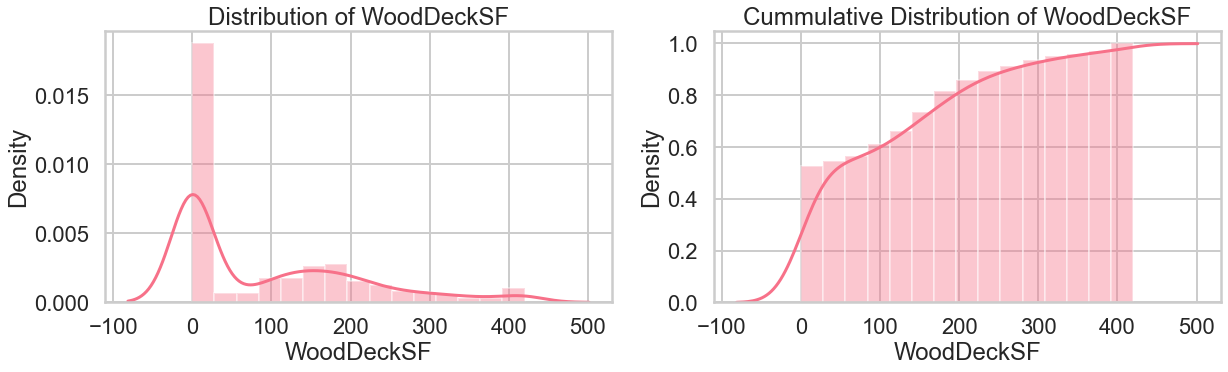

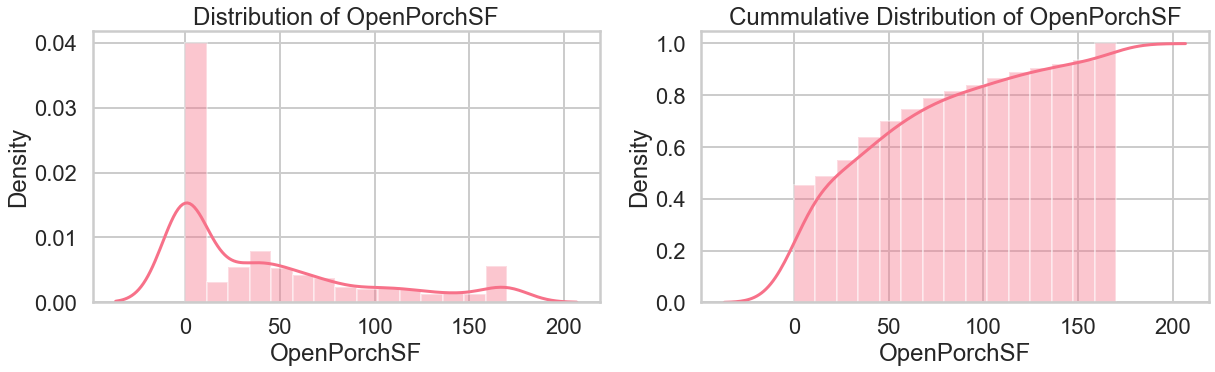

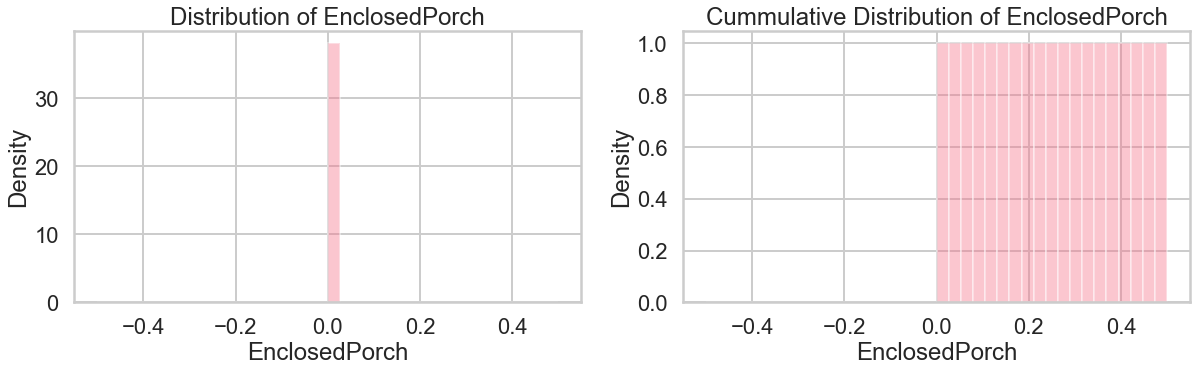

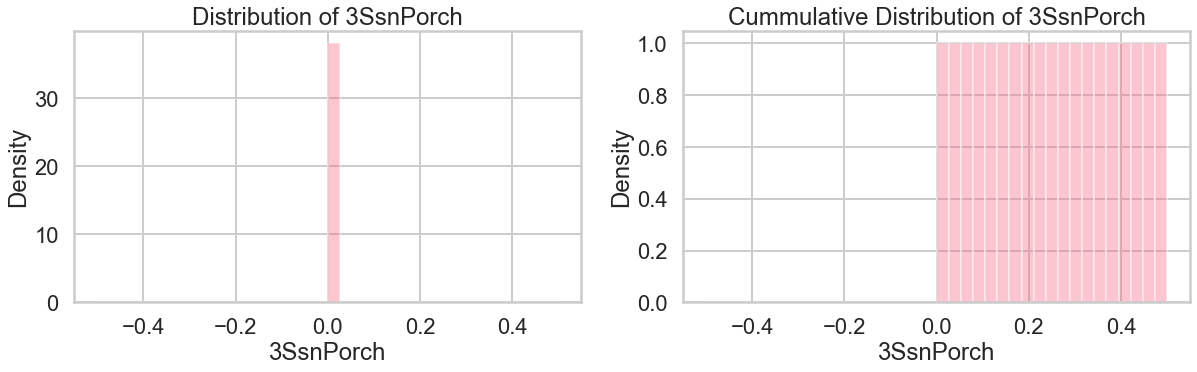

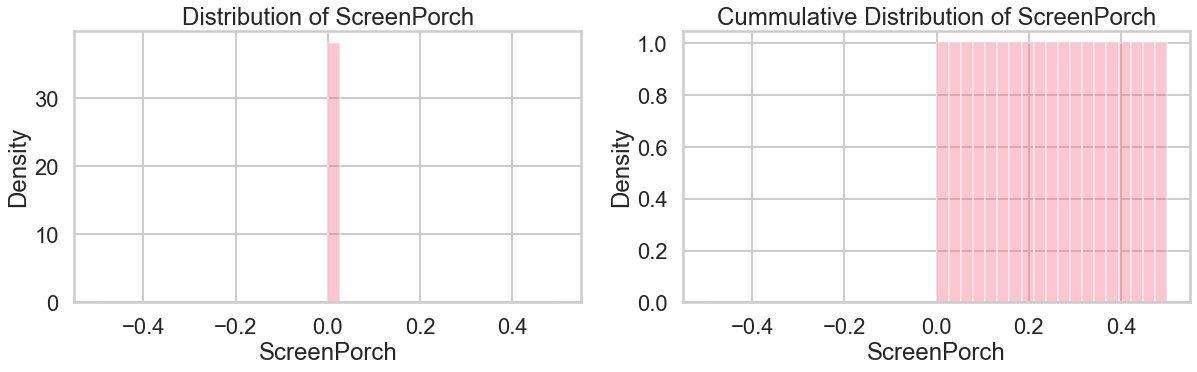

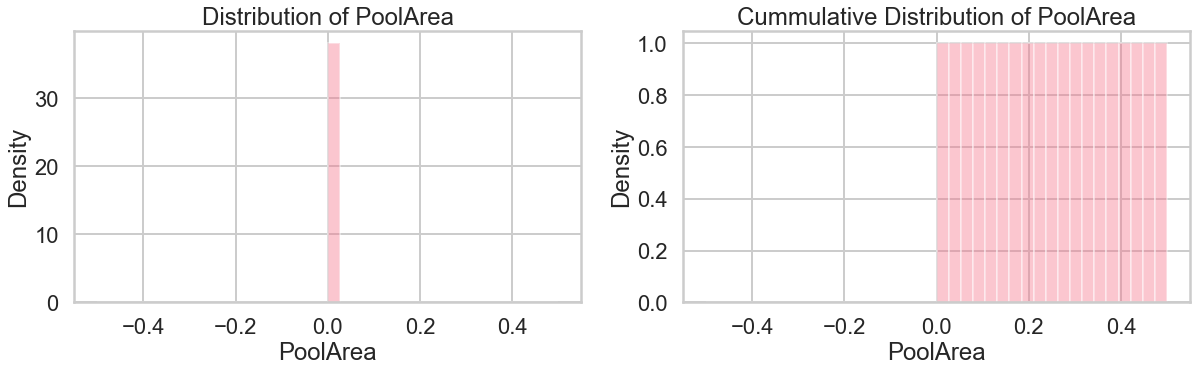

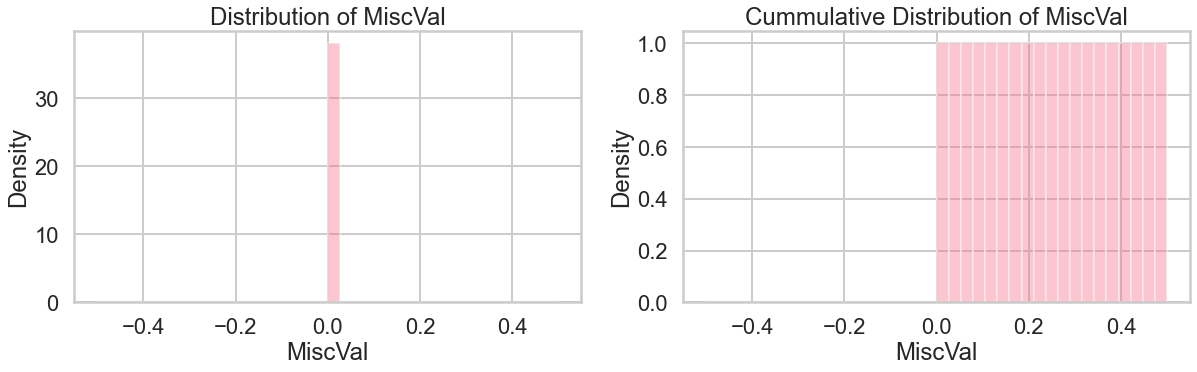

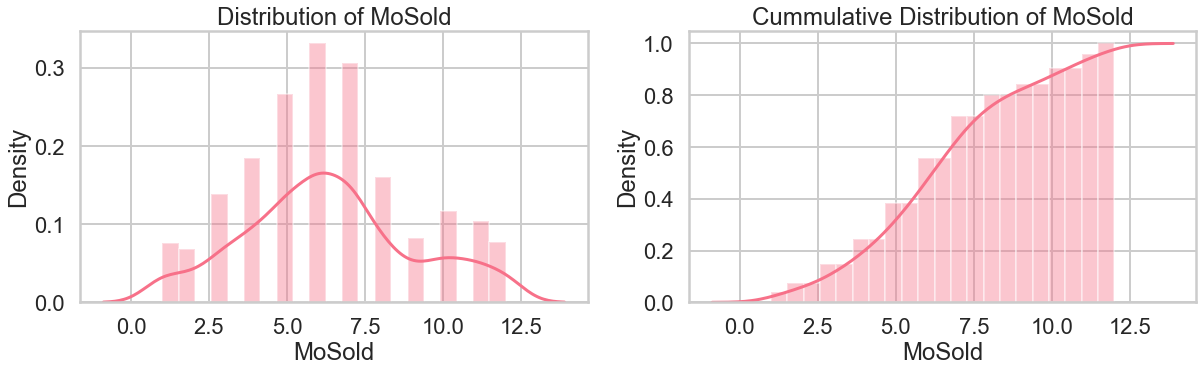

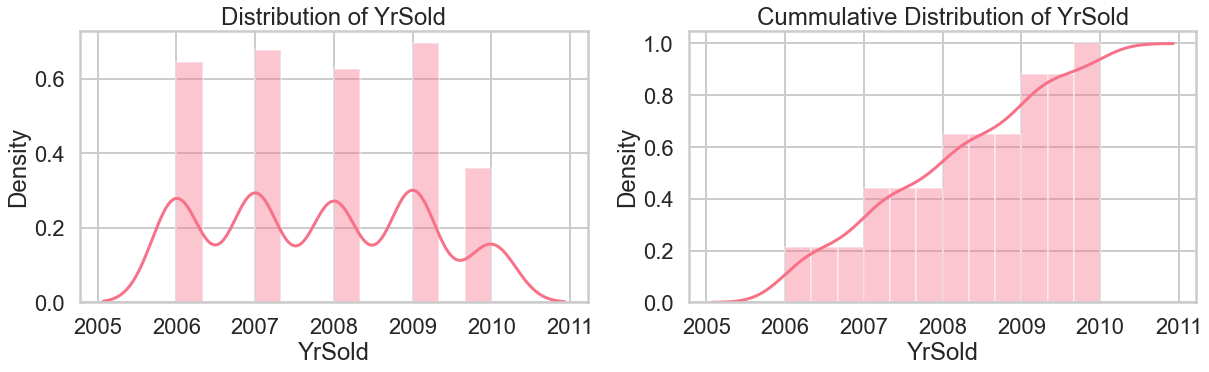

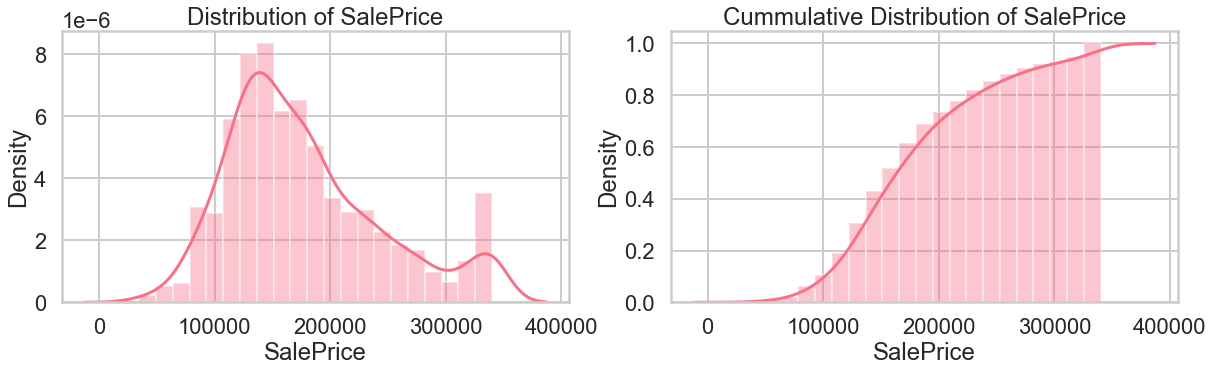

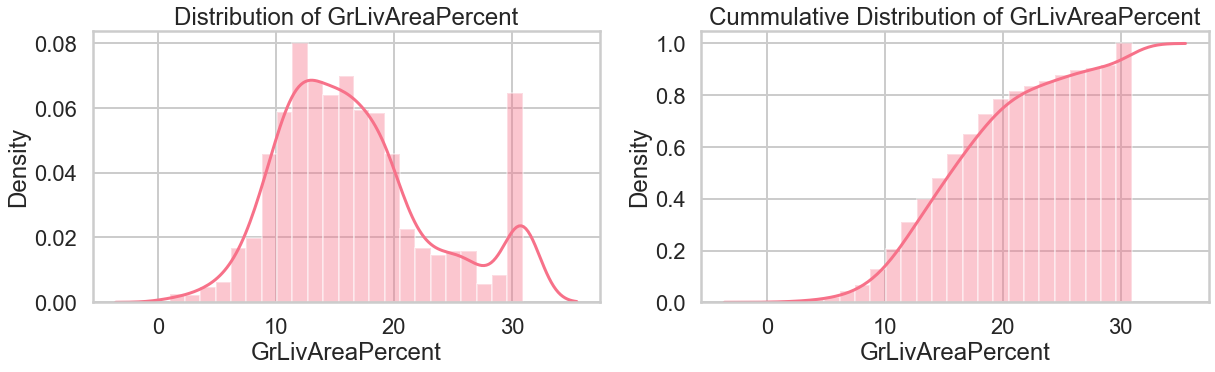

In [90]:
# First take numerical/continous features - Histogram and CDF
for i in numeric_features:
    fig,ax = plt.subplots(1,2,figsize=(20,5))
    sns.distplot(house_data[i],ax=ax[0])
    ax[0].set_title('Distribution of {}'.format(i))
    
    sns.distplot(house_data[i],ax=ax[1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
    ax[1].set_title('Cummulative Distribution of {}'.format(i))
plt.show()

##### Observation
- Skewed normal distribution: - MSSubClass, YearBuild, YearRemodAdd, MasVnrArea, BsmtFinSF1,BsmtFinSF2, BsmtUnfSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, HalfBath, KitchenAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal

- All other numeric variables are approximately normally distributed


### Bivariate analysis

#### Analysing relationship between Sale Price and Categorical Variables

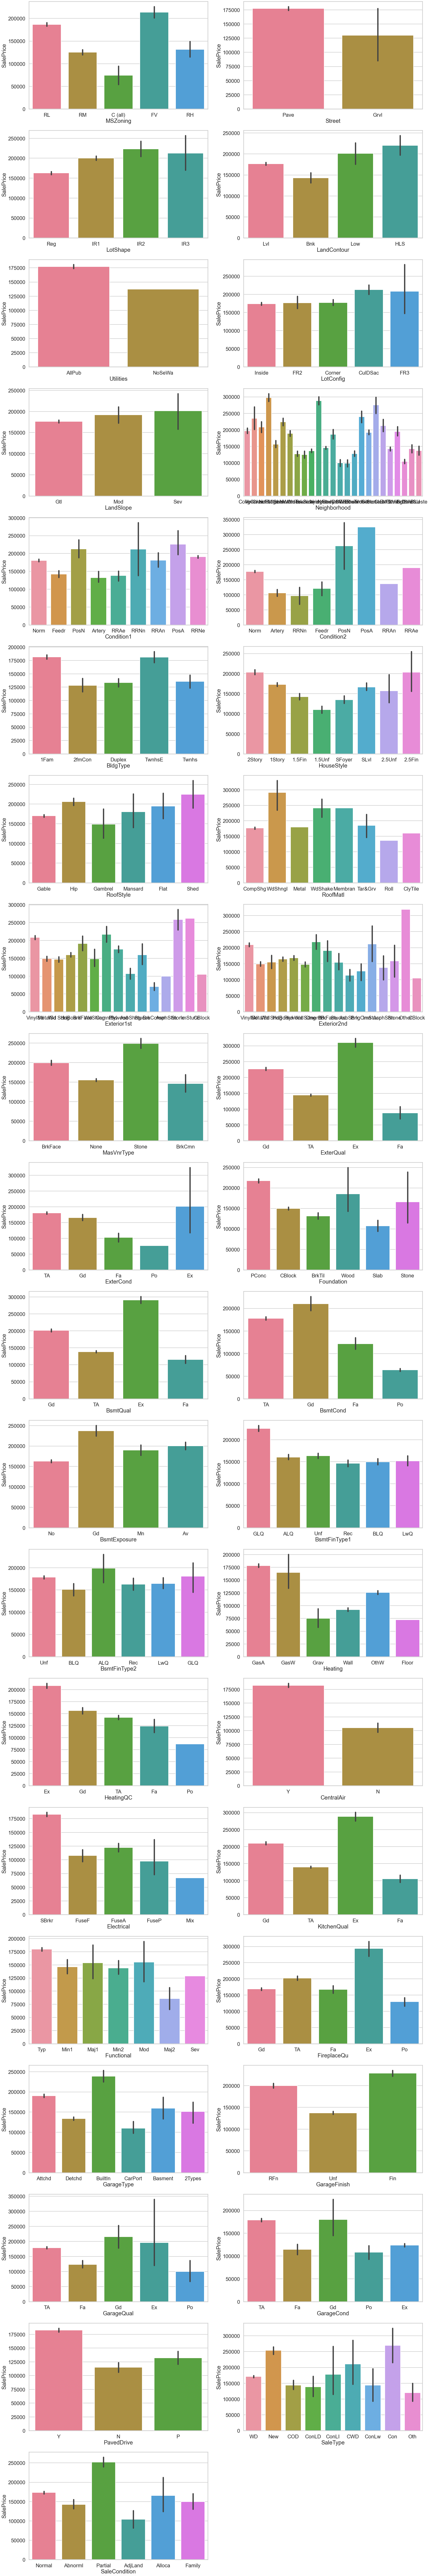

In [91]:
categorical_features = house_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(30,200))
j=1
for i in categorical_features:
    plt.subplot(20,2,j)
    sns.barplot(x=house_data[i],y=house_data['SalePrice'])
    j+=1
plt.show()

##### Observation
- Sale Price is highest for Floating Village Residential and lowest for Commercial 
- Sale Price is higher in Paved Street compared to Gravel
- Sale Price is higher in Poured Concrete foundation and lowest for Slab type foundation Street
- Sale Price is higher where all Public facilities are available
- Sale Price is higher in high slope land
- Sale Price is higher in excellent exterior condition and Price decreases as quality of exterior goes down
- Sale Price is higher in good basement condition and excellent basement condition with good exposure and Price decreases as condition of basement goes down
- Sale Price is higher in Gas based heating be it GasA or GasB and also where quality of heating is excellent and lower for Floor and Gravity heating
- Sale Price is higher in Central Air Conditioning conpared to No Air Conditioning
- Sale Price is higher where Standard Circuit Breakers & Romex is installed compared to other types of electrical system
- Sale Price is higher for Excellent Quality of Kitchen & Fire Place and Price decreases as quality of Kitchen & Fire Place goes down
- Sale Price is higher for Good Garage Quality, Garage condition and Garage Finish and goes down as garage condition goes down
- Sale Price is higher in Paved driveway way compared to Gravel/Dirt Paved driveway
- Sale Price is lower in case where adjoining land was purchased
- Sale Price is higher for new homes and in the cases where Contract to be made with 15% Down payment regular terms


#### Analysing relationship between Sale Price and Categorical Variables

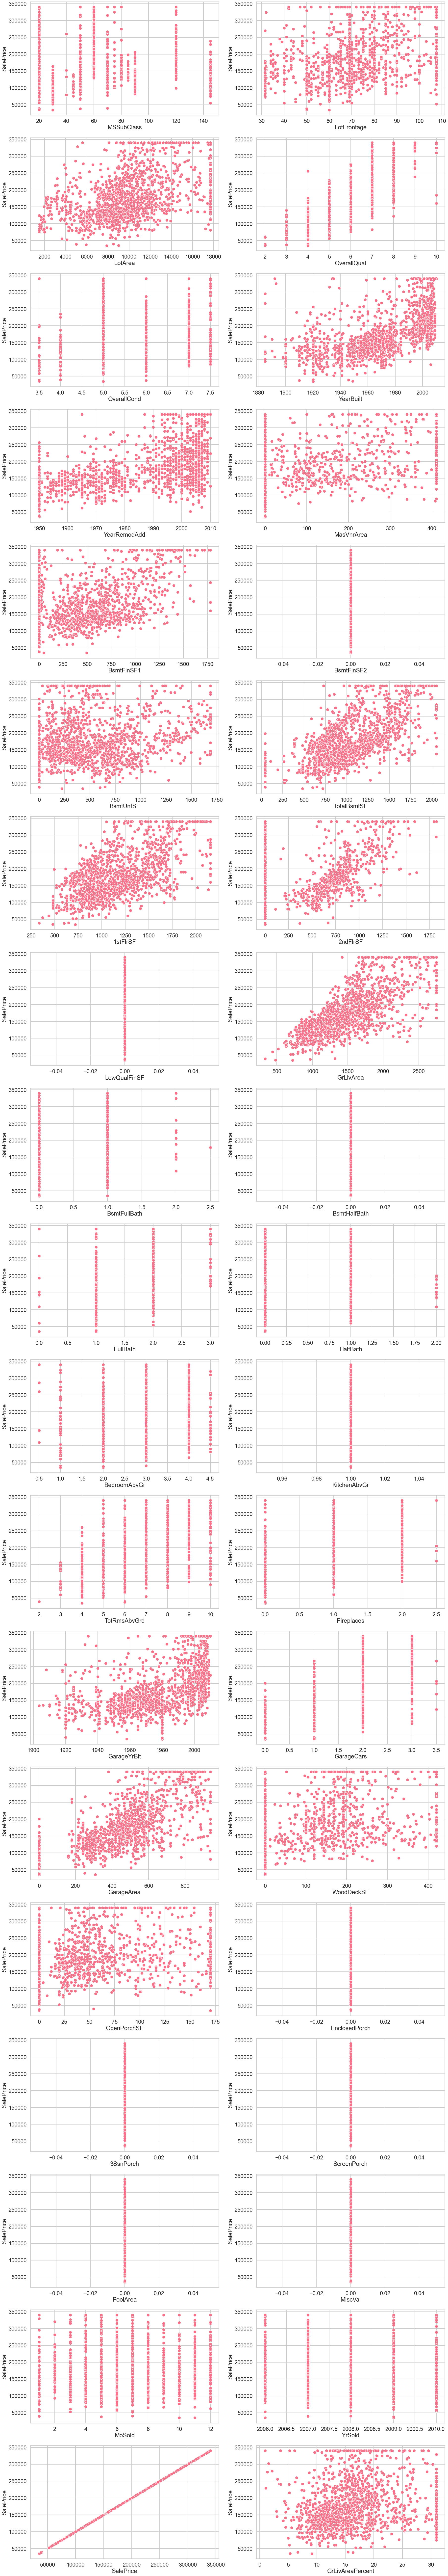

In [92]:
plt.figure(figsize=(30,200))
j=1
for i in numeric_features:
    plt.subplot(20,2,j)
    sns.scatterplot(x=house_data[i],y=house_data['SalePrice'])
    j+=1
plt.show()

##### Observation

###### Sale Price increases as 
    - Lot Area & Lot Front Area increases
    - Overall quality of improves
    - Built Year of Home increases
    - Masonary veneer area increases, 
    - Total Basement Finished area increases 
    - 1st Floor area, 2nd floor area, Living area above ground and Percent of Living area above ground increases
    - Total Rooms above ground increases
    - Garage Area increases
    - Wood Deck area, Open Porch area increases


## Multi variate analysis

### Relation of  `SalePrice` with `LotArea` and `RoofStyle`

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

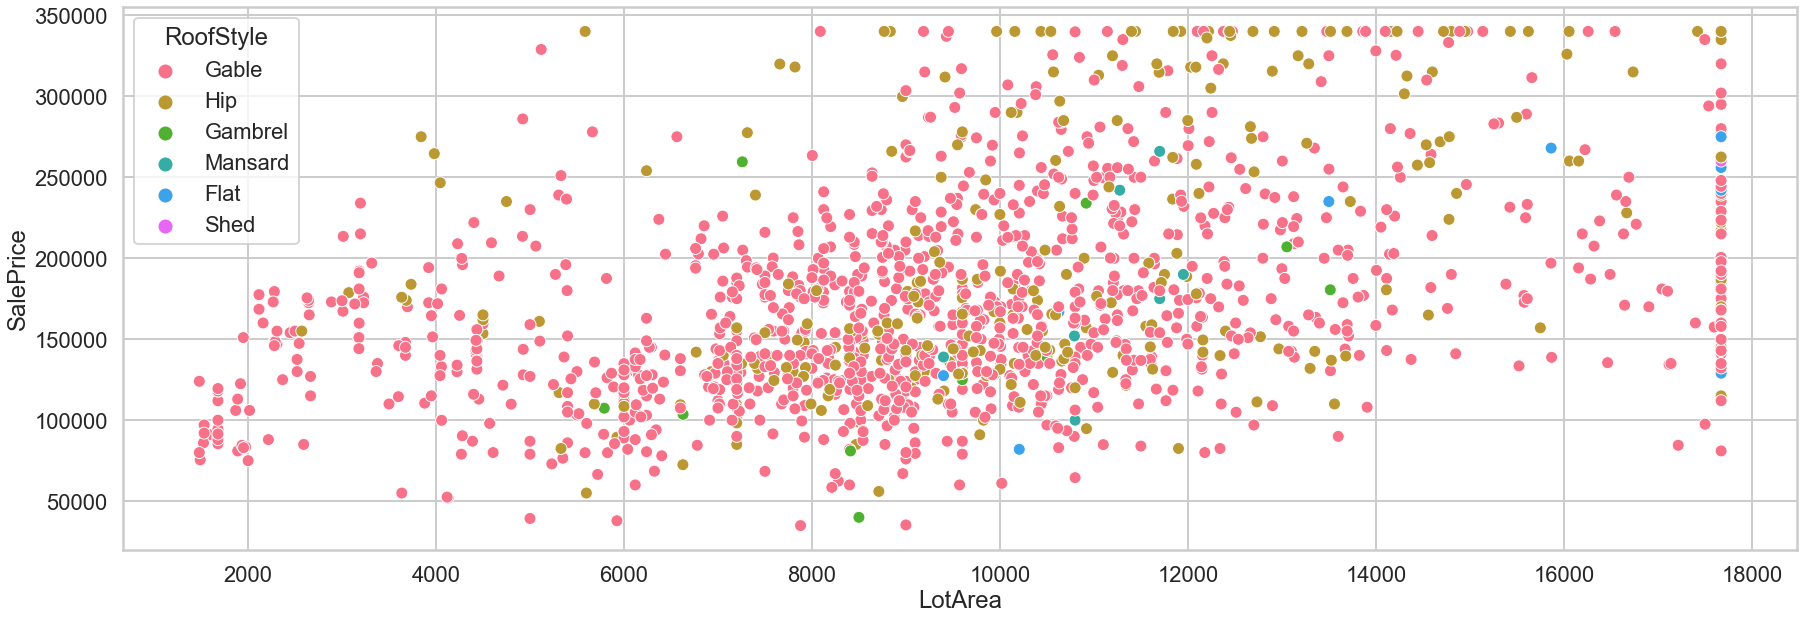

In [93]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=house_data,x='LotArea',y='SalePrice', hue='RoofStyle')

##### Observation
- House Sale Price increases with `LotArea` and `RoofStyle`(Highest for Hip and lowest for Gambrel)

### Relation of  `SalePrice` with `OverallQual` and `MSZoning`

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

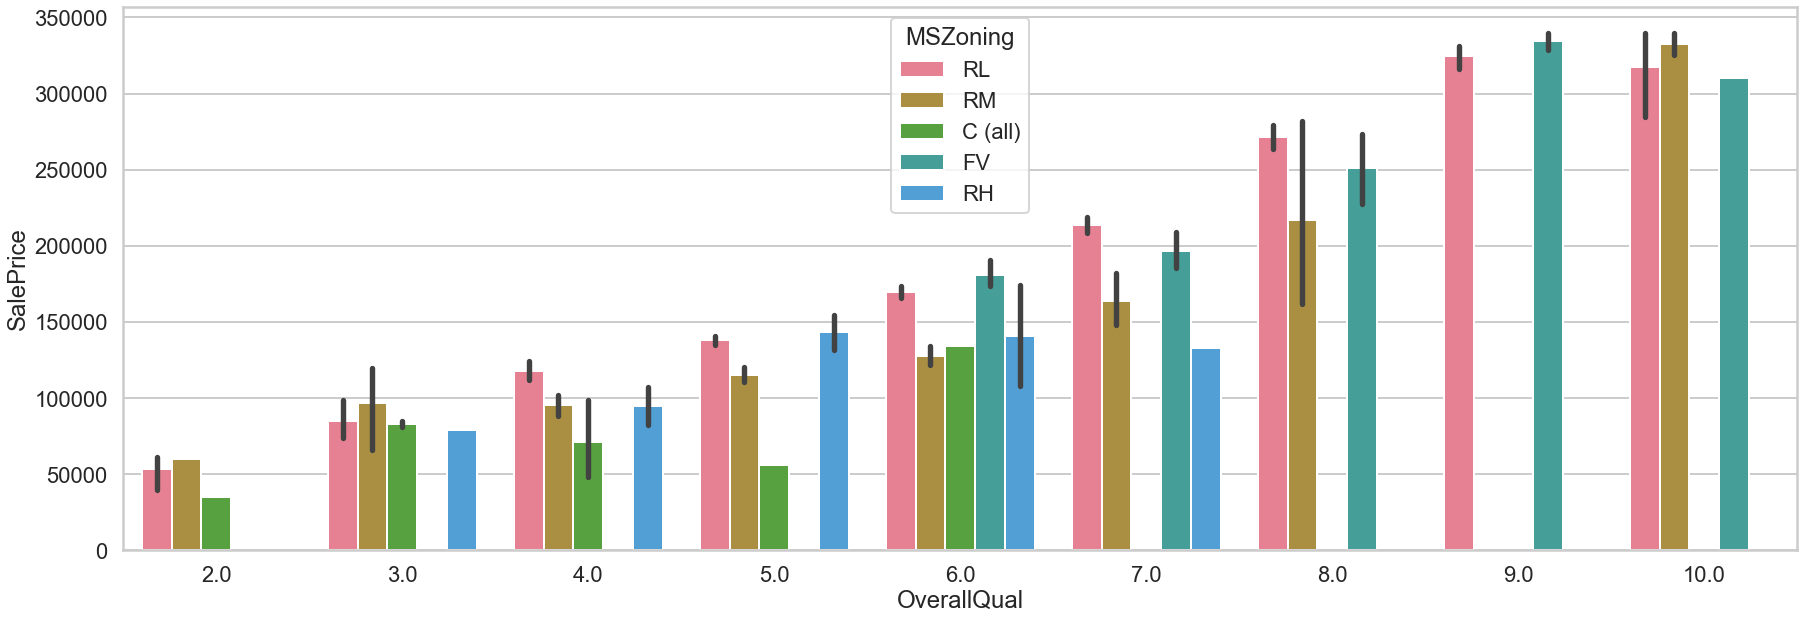

In [94]:
plt.figure(figsize=(30,10))
sns.barplot(data=house_data,y='SalePrice',x='OverallQual', hue='MSZoning')

##### Observation
- House Sale Price increases with `OverallQual` and `MSZoning`(Highest for Floating Village and Residential Low Density and lowest for Commercial)

### Step 3 : Data Preparation
- For Categorical features, we'll create dummy features

In [95]:
categorical_features = house_data.select_dtypes(include=['object']).columns

In [96]:
dummy1 = pd.get_dummies(house_data[categorical_features], drop_first=True)
house_data = pd.concat([house_data,dummy1],axis=1)

In [97]:
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0        60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1        20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2        60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3        70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4        60.0       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story          7.0          5.0     2003.0        2003.0     Gable   
1     1Story          6.0          7.5     1976.0        1976.0     Gable   
2     2Story          7.0          5.0     2001.0        2002.0     Gable   
3     2Story          7.0          5.0     1915.0        1970.0     Gable   
4     2Story          8.0          5.0     2000.0        2000.0     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr     856.0     854.0           0.0     1710.0   
1          Y      SBrkr    1262.0       0.0           0.0     1262.0   
2          Y      SBrkr     920.0     866.0           0.0     1786.0   
3          Y      SBrkr     961.0     756.0           0.0     1717.0   
4          Y      SBrkr    1145.0    1053.0           0.0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0       2.0       1.0           3.0           1.0   
1           0.0           0.0       2.0       0.0           3.0           1.0   
2           1.0           0.0       2.0       1.0           3.0           1.0   
3           1.0           0.0       1.0       0.0           3.0           1.0   
4           1.0           0.0       2.0       1.0           4.0           1.0   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd           8.0        Typ         0.0          Gd     Attchd   
1          TA           6.0        Typ         1.0          TA     Attchd   
2          Gd           6.0        Typ         1.0          TA     Attchd   
3          Gd           7.0

In [98]:
house_data = house_data.drop(categorical_features,axis=1)
house_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          7.5     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        2003.0       196.0       706.0         0.0      150.0        856.0   
1        1976.0         0.0       978.0         0.0      284.0       1262.0   
2        2002.0       162.0       486.0         0.0      434.0        920.0   
3        1970.0         0.0       216.0         0.0      540.0        756.0   
4        2000.0       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           0.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       2.0       1.0           3.0           1.0           8.0         0.0   
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0         0.0         61.0   
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3            0.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  GrLivAreaPercent  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0   208500.0             20.24            0            0            1   
1   181500.0             13.15            0            0            1   
2   223500.0             15.88            0            0            1   
3   140000.0             17.98            0            0            1   
4   250000.0             15.41            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             1   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4

In [99]:
house_data.shape

(1460, 238)

### Step 4 : Feature Scaling
-  scaling the features - necessary before using Ridge or Lasso (in case model is overfit)


In [100]:
y = house_data.SalePrice
X = house_data.drop(['SalePrice'],axis=1)
cols= X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

### Step 5 : Test Train Data Split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

### Step 6 : Model Building & Ealuation

In [102]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train,y_pred_train)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
metric1.append(mse_test_lr*0.5)
metric1

[0.9555392671115115,
 -4.892664220014666e+22,
 206088947219.32812,
 9.562455276498852e+34,
 14207.395793026748,
 1.0891179130408715e+32]

#### Observation
 - As r2_score for test data has significantly dropped from 95.5% of train data, our model is overfitting

In [104]:
y_res_train = y_train-y_pred_train

Text(0, 0.5, 'residual')

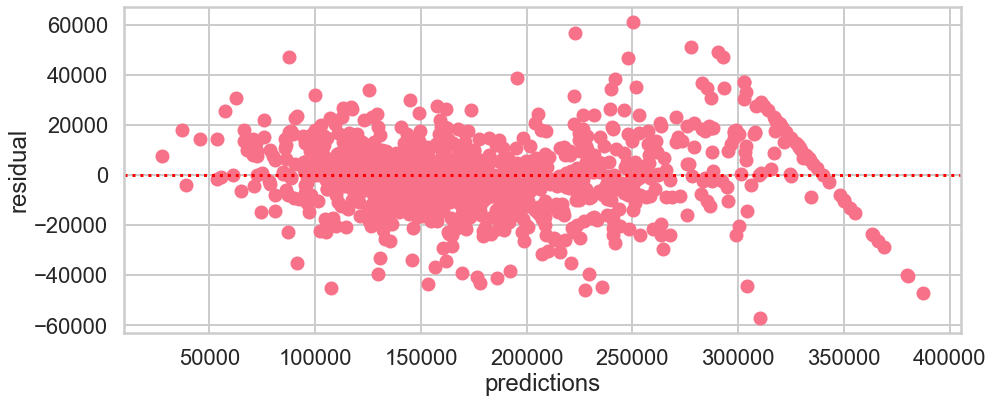

In [105]:
plt.figure(figsize=(15,6))
plt.scatter(y_pred_train,y_res_train)
plt.axhline(y=0,color='red',linestyle=':')
plt.xlabel('predictions')
plt.ylabel('residual')

#### Observation
- Error terms are having almost constant deviation from zero line across dependendent variable. Although there are outlies of error terms, but most of the error terms follws constant deviation from zero line.

Text(0.5, 0, 'Residuals')

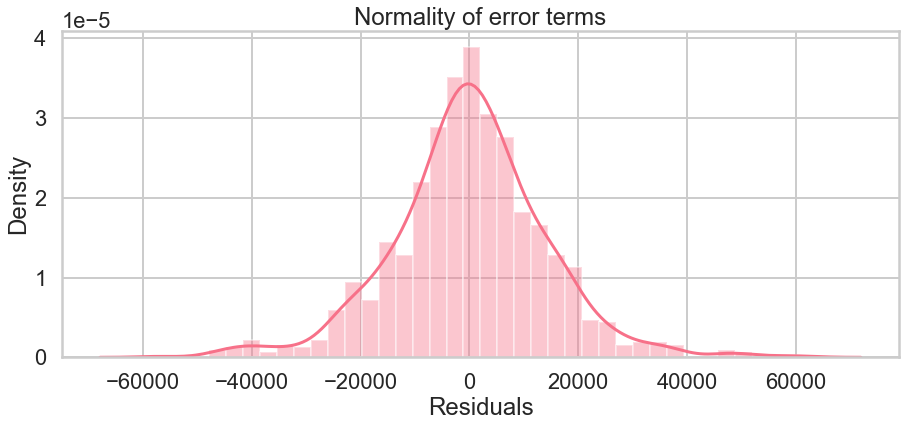

In [106]:
plt.figure(figsize=(15,6))
sns.distplot(y_res_train)
plt.title("Normality of error terms")
plt.xlabel('Residuals')

#### Observation
- Error terms follows normal distribution

### Step 7 : Regularization usuing Ridge/Lasso Regression

### Ridge regression 

In [107]:
# list of alpha to tune - if value is too high then model will underfit and if value is too low then 
# it will not be able to handle overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        cv=folds,
                        param_grid = params,
                        scoring='neg_mean_absolute_error',
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# printing best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [109]:
# Fitting ridge model for best alpha
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [110]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

metric2

[0.9432875826381488,
 0.8838627798024634,
 262879211138.53635,
 226984097852.62427,
 16045.943194023648,
 22738.69079102411]

### Lasso regression 

In [111]:
lasso = Lasso()
model_cv = GridSearchCV(estimator=lasso,
                       cv=folds,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [113]:
#Fitting Ridge model for best alpha
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)
metric3

[0.9343942591942713,
 0.8936083152980213,
 304102455713.17194,
 207936960519.843,
 17258.26338190005,
 21763.742838103575]

In [115]:
# creating table for all metrics
lr_table = {'Metric':['R2 Score(train)','R2 Score(test)','RSS(train)','RSS(test)','MSE(train)','MSE(test)'],
           'Linear Regression': metric1,
            'Ridge': metric2,
            'Lasso': metric3
           }
all_metrics = pd.DataFrame(lr_table,columns=['Metric', 'Linear Regression', 'Ridge','Lasso'])
all_metrics 

Metric  Linear Regression         Ridge         Lasso
0  R2 Score(train)       9.555393e-01  9.432876e-01  9.343943e-01
1   R2 Score(test)      -4.892664e+22  8.838628e-01  8.936083e-01
2       RSS(train)       2.060889e+11  2.628792e+11  3.041025e+11
3        RSS(test)       9.562455e+34  2.269841e+11  2.079370e+11
4       MSE(train)       1.420740e+04  1.604594e+04  1.725826e+04
5        MSE(test)       1.089118e+32  2.273869e+04  2.176374e+04

#### Changes in coefficients for Linear Regression, Ridge, Lasso

In [116]:
# creating table for all metrics
pd.options.display.max_rows = 300
betas_table = {'Features':cols,
            'Linear Regression': lm.coef_,
            'Ridge': ridge.coef_,
            'Lasso': lasso.coef_
           }
betas = pd.DataFrame(betas_table,columns=['Features', 'Linear Regression', 'Ridge','Lasso'])
betas 

Features  Linear Regression         Ridge         Lasso
0               MSSubClass      -1.085523e+01  -2539.043214  -3829.397776
1              LotFrontage      -2.830279e+02    808.163711      0.000000
2                  LotArea      -3.362572e+02   5115.674263   4300.018551
3              OverallQual       9.122132e+03   8549.133749  11947.694337
4              OverallCond       5.061143e+03   4193.355305   4462.144281
5                YearBuilt       8.834990e+03   3295.798943   7576.868028
6             YearRemodAdd       4.517011e+03   4015.767046   4558.797771
7               MasVnrArea       2.309896e+03   2446.774900   1823.924207
8               BsmtFinSF1      -4.632788e+02   3469.946751   4717.135514
9               BsmtFinSF2      -1.931354e+16      0.000000      0.000000
10               BsmtUnfSF      -5.210179e+03   -623.342267     -0.000000
11             TotalBsmtSF       1.165903e+04   6311.605848   5149.200229
12                1stFlrSF      -4.768801e+02   5656.135667      0.000000
13                2ndFlrSF       3.159457e+03   5058.522146      0.000000
14            LowQualFinSF       3.140562e+15      0.000000      0.000000
15               GrLivArea       2.911059e+04  10946.302743  23588.897168
16            BsmtFullBath       2.179026e+03   2319.055665   2288.789187
17            BsmtHalfBath      -2.825944e+15      0.000000      0.000000
18                FullBath      -2.188769e+02   1178.589058      0.000000
19                HalfBath      -1.251151e+03    726.118187      0.000000
20            BedroomAbvGr      -1.005813e+03   -698.683578   -733.781402
21            KitchenAbvGr      -3.666305e+14      0.000000      0.000000
22            TotRmsAbvGrd      -1.016075e+03   1609.731878      0.000000
23              Fireplaces       2.037666e+03   2713.471551   2135.282688
24             GarageYrBlt       1.334818e+02    648.337238      0.000000
25              GarageCars      -5.783349e+02   2287.979009   2518.812881
26              GarageArea       6.832236e+03   4023.769677   3225.711741
27              WoodDeckSF       1.307711e+03   1328.106491   1275.189683
28             OpenPorchSF       1.520256e+03   1688.943937    782.659262
29           EnclosedPorch      -5.520377e+14      0.000000      0.000000
30               3SsnPorch      -3.889328e+14      0.000000      0.000000
31             ScreenPorch      -8.180820e+14      0.000000      0.000000
32                PoolArea       6.855151e+14      0.000000      0.000000
33                 MiscVal       7.084322e+14      0.000000      0.000000
34                  MoSold       8.144022e+02    970.613013    430.186894
35                  YrSold      -4.826113e+02   -229.228722     -0.000000
36        GrLivAreaPercent      -7.690978e+03    606.000723     -0.000000
37             MSZoning_FV       8.011620e+03   1391.358500      0.000000
38             MSZoning_RH       4.003784e+03    615.261211      0.000000
39             MSZoning_RL       1.456425e+04   2216.087482   1607.475760
40             MSZoning_RM       1.100392e+04    327.394622     -0.000000
41             Street_Pave       4.963168e+02    440.402864     94.162171
42            LotShape_IR2      -7.162396e+02   -599.265278     -0.000000
43            LotShape_IR3       7.938485e+02  -1109.626030   -835.738171
44            LotShape_Reg       1.934857e+01   -158.616285     -0.000000
45         LandContour_HLS       7.608585e+02   1311.103324    483.965749
46         LandContour_Low       5.990120e+02   1017.966164    336.325539
47         LandContour_Lvl       1.742755e+03   1733.954508      0.000000
48        Utilities_NoSeWa      -4.249479e+02   -760.778823   -511.419284
49       LotConfig_CulDSac       9.431078e+02   1354.892385    896.455767
50           LotConfig_FR2      -9.419063e+02  -1006.824859   -502.161497
51           LotConfig_FR3      -3.512079e+02   -572.601240     -0.000000
52        LotConfig_Inside       1.300052e+02    247.284745      0.000000
53           LandSlope

## Business Interpretation of Independent Predictors
 - Living Area above ground is the most important predictor in Sale Price prediction
 - Type of Dwelling involved in Sale plays a vital role. As we go from 20 to 190 (1-STORY 1946 & NEWER ALL STYLES to 2 FAMILY CONVERSION - ALL STYLES AND AGES), Sale Price gets decreased
 - Sale Price is higher for Residential Low Density area compared to other zones.
 - Lot Area plays a major roll for Sale Price of House
 - Overall Quality of material, finish of house and condition of house is key factor for Sale Price
 - Built year and Remodel year of house is an important factor because as house gets older, overall condition of the house may get detoriated over a period of time and that is the reason why Sale Price gets increases as Built year increases.
 - SalePrice increases with Total Basement Area, Number of Fire Places, Garage Area and Garage Quality.
 - Irregular Shape of Property wrongly affects Sale Price.
 - Sale Price is higher for Moderately sloped property compared to severely sloped property
 - Higher Sale Price for property which have Crawford,Northridge, Northridge Heights,Somerset,Stone Brook,Timberland and Veenker as neighbour comapred to other neighbours
 - Mansard Roofstyle and Standard (Composite) Shingle as roof material increases Sale Price compared to other styles and material types.
 - Wood Siding Exterior covering adversely affects house price whereas Wood Shingles increases Sale Price
 - Good Basement exposure and Typical functionality of house increases Sale Price
 - Sale Price is also dependent on type of Sale. If type of sale is Warranty Deed - Cash, Contract 15% Down payment regular terms and Home just constructed and sold then price of house is higher compared to other Sale type
 

## As Lasso performs feature elimination, we are going to select Lasso regression for our prediction

### Subjective Quesion 4:
- Question is about finding five most important predictors which are misssing in Lasso reression and to build the model without these variablrs and to get five most important predictors for build model

#### Following five most important predictors/features are not included by Lasso model:
1. 1stFlrSF,
2. 2ndFlrSF,
3. FullBath,
4. TotRmsAbvGrd,
5. LotFrontage

Let's create Lasso model without above features

In [117]:
X_train_new = X_train.drop(['1stFlrSF','2ndFlrSF','FullBath','TotRmsAbvGrd','LotFrontage'],axis=1)
X_test_new = X_test.drop(['1stFlrSF','2ndFlrSF','FullBath','TotRmsAbvGrd','LotFrontage'],axis=1)

### Lasso regression with above five features excluded

In [118]:
lasso = Lasso()
model_cv = GridSearchCV(estimator=lasso,
                       cv=folds,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train_new,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [120]:
#Fitting Ridge model for best alpha
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [121]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)
metric3

[0.9343944370419718,
 0.8936079653378262,
 304101631335.27765,
 207937644498.66614,
 17258.239989552836,
 21763.77863243022]

In [122]:
# creating table for all metrics
lr_table = {'Metric':['R2 Score(train)','R2 Score(test)','RSS(train)','RSS(test)','MSE(train)','MSE(test)'],
            'Lasso': metric3
           }
all_metrics = pd.DataFrame(lr_table,columns=['Metric','Lasso'])
all_metrics 

Metric         Lasso
0  R2 Score(train)  9.343944e-01
1   R2 Score(test)  8.936080e-01
2       RSS(train)  3.041016e+11
3        RSS(test)  2.079376e+11
4       MSE(train)  1.725824e+04
5        MSE(test)  2.176378e+04

#### Changes in coefficients for Linear Regression, Ridge, Lasso

In [123]:
# creating table for all coefficients
cols = X_train_new.columns
betas_table = {'Features':cols,
            'Lasso': lasso.coef_
           }
betas = pd.DataFrame(betas_table,columns=['Features', 'Lasso'])
betas 

Features         Lasso
0               MSSubClass  -3829.439465
1                  LotArea   4300.080850
2              OverallQual  11948.012851
3              OverallCond   4462.059600
4                YearBuilt   7576.897808
5             YearRemodAdd   4558.820528
6               MasVnrArea   1823.947897
7               BsmtFinSF1   4717.080688
8               BsmtFinSF2      0.000000
9                BsmtUnfSF     -0.000000
10             TotalBsmtSF   5149.185023
11            LowQualFinSF      0.000000
12               GrLivArea  23588.786568
13            BsmtFullBath   2288.754989
14            BsmtHalfBath      0.000000
15                HalfBath      0.000000
16            BedroomAbvGr   -733.772830
17            KitchenAbvGr      0.000000
18              Fireplaces   2135.236003
19             GarageYrBlt      0.000000
20              GarageCars   2518.753301
21              GarageArea   3225.659404
22              WoodDeckSF   1275.175612
23             OpenPorchSF    782.651427
24           EnclosedPorch      0.000000
25               3SsnPorch      0.000000
26             ScreenPorch      0.000000
27                PoolArea      0.000000
28                 MiscVal      0.000000
29                  MoSold    430.186867
30                  YrSold     -0.000000
31        GrLivAreaPercent     -0.000000
32             MSZoning_FV      0.000000
33             MSZoning_RH      0.000000
34             MSZoning_RL   1607.416180
35             MSZoning_RM     -0.000000
36             Street_Pave     94.111183
37            LotShape_IR2     -0.000000
38            LotShape_IR3   -835.739937
39            LotShape_Reg     -0.000000
40         LandContour_HLS    483.970778
41         LandContour_Low    336.336732
42         LandContour_Lvl      0.000000
43        Utilities_NoSeWa   -511.413085
44       LotConfig_CulDSac    896.460539
45           LotConfig_FR2   -502.172090
46           LotConfig_FR3     -0.000000
47        LotConfig_Inside      0.000000
48           LandSlope_Mod    437.605216
49           LandSlope_Sev    109.978477
50    Neighborhood_Blueste      0.000000
51     Neighborhood_BrDale      0.000000
52    Neighborhood_BrkSide   1106.280773
53    Neighborhood_ClearCr   1749.172286
54    Neighborhood_CollgCr     -0.000000
55    Neighborhood_Crawfor   3939.402512
56    Neighborhood_Edwards  -1353.673736
57    Neighborhood_Gilbert      0.000000
58     Neighborhood_IDOTRR     -0.000000
59    Neighborhood_MeadowV   -136.712210
60    Neighborhood_Mitchel   -965.495188
61      Neighborhood_NAmes   -820.118091
62    Neighborhood_NPkVill     20.993316
63     Neighborhood_NWAmes   -466.822284
64    Neighborhood_NoRidge   3168.461265
65    Neighborhood_NridgHt   5088.318963
66    Neighborhood_OldTown    -58.377806
67      Neighborhood_SWISU     47.600619
68     Neighborhood_Sawyer     -0.000000
69    Neighborhood_SawyerW      0.000000
70    Neighborhood_Somerst   4610.766255
71    Neighborhood_StoneBr   2341.777153
72     Neighborhood_Timber    773.229107
73    Neighborhood_Veenker   1105.822188
74        Condition1_Feedr   -396.547331
75         Condition1_Norm   2810.112288
76         Condition1_PosA    319.342721
77         Condition1_PosN    214.507496
78         Condition1_RRAe  -1045.358972
79         Condition1_RRAn      0.000000
80         Condition1_RRNe      0.000000
81         Condition1_RRNn      0.000000
82        Condition2_Feedr     -0.000000
83         Condition2_Norm    441.280155
84         Condition2_PosA   1673.359181
85         Condition2_PosN  -6044.746790
86         Condition2_RRAe    -72.790058
87         Condition2_RRAn     -0.000000
88         Condition2_RRNn      0.000000
89         BldgType_2fmCon    -41.324420
90         BldgType_Duplex  -1708.336776
91          BldgType_Twnhs  -1462.113212
92         BldgType_TwnhsE      0.000000
93       HouseStyle_1.5Unf    132.246202
94       HouseStyle_1Story      0.000000
95       HouseStyle_2.5Fin     -0.000000
96       HouseStyle_2.5Unf   -562.485172


#### Observation
- From above, we can observe that following are the five most important predictors for the build Lasso Model:
1. GrLivArea
2. OverallQual
3. YearBuilt
4. LotArea
5. GarageArea